<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Methods-for-Data-Science---Coursework-2" data-toc-modified-id="Methods-for-Data-Science---Coursework-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Methods for Data Science - Coursework 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tudor-Trita-Trita" data-toc-modified-id="Tudor-Trita-Trita-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Tudor Trita Trita</a></span></li><li><span><a href="#CID:-01199397" data-toc-modified-id="CID:-01199397-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>CID: 01199397</a></span></li></ul></li><li><span><a href="#Task-0---Preliminaries" data-toc-modified-id="Task-0---Preliminaries-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Task 0 - Preliminaries</a></span></li><li><span><a href="#Task-1:-Random-Forest-Classifier" data-toc-modified-id="Task-1:-Random-Forest-Classifier-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Task 1: Random Forest Classifier</a></span></li><li><span><a href="#Task-2:-Support-Vector-Machines" data-toc-modified-id="Task-2:-Support-Vector-Machines-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Task 2: Support Vector Machines</a></span></li><li><span><a href="#Task-3:-Neural-Networks" data-toc-modified-id="Task-3:-Neural-Networks-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Task 3: Neural Networks</a></span></li><li><span><a href="#Task-4:-Discussion-of-Results" data-toc-modified-id="Task-4:-Discussion-of-Results-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Task 4: Discussion of Results</a></span></li><li><span><a href="#Task-5:-Mastery-Component" data-toc-modified-id="Task-5:-Mastery-Component-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Task 5: Mastery Component</a></span></li></ul></li></ul></li></ul></div>

# Methods for Data Science - Coursework 2

#### Tudor Trita Trita

#### CID: 01199397

_Note: Python 3.7 Used (F-String Enabled, 3.6+)_

In [1]:
from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell

import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import os
cwd = os.getcwd()

import pandas as pd

import seaborn as sns

import sklearn
import sklearn.ensemble
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm

import time

import torch
import torch.nn
import torch.utils.data
import torch.nn.functional

In [2]:
# from google.colab import files
# from google.colab import drive
# upload = files.upload()

### Task 0 - Preliminaries
***

In this section, we will clean the data.

In [2]:
df_trn_original = pd.read_csv("train_set.csv")
df_tst_original = pd.read_csv("test_set.csv")

In [3]:
print(f"Number of null values = {df_trn_original.isnull().sum().sum()}")

Number of null values = 0


In [4]:
print(f"Duplicates in training data = {df_trn_original.duplicated().sum()}")
print(f"Duplicates in test data = {df_tst_original.duplicated().sum()}")
print(f"Duplicates across all data = {pd.concat([df_trn_original, df_tst_original]).duplicated().sum()}")

Duplicates in training data = 0
Duplicates in test data = 0
Duplicates across all data = 0


In [5]:
print(f"The dimensions of the training data are {df_trn_original.shape}")
print(f"The dimensions of the test data are {df_tst_original.shape}")

The dimensions of the training data are (3988, 8)
The dimensions of the test data are (992, 8)


In [6]:
# Unique values in training set
df_trn_original.groupby('rating')['rating'].count()

rating
acc       861
good      871
unacc    1405
vgood     851
Name: rating, dtype: int64

In [7]:
# Unique values in test set
df_tst_original.groupby('rating')['rating'].count()

rating
acc      188
good     204
unacc    412
vgood    188
Name: rating, dtype: int64

We can see that the data is unbalanced. Balancing the data may improve predictions, but Prof. Barahona has said that this was not needed for this coursework.

In [8]:
# Display head of train data
df_trn_original.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,rating
0,0,low,med,3,4,small,high,good
1,0,vhigh,vhigh,2,2,small,low,good
2,0,med,med,5more,4,med,high,good
3,0,low,med,3,4,small,high,unacc
4,0,vhigh,vhigh,2,2,small,low,unacc


In [9]:
# Display tail of test data
df_tst_original.tail()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,rating
987,1679,low,low,4,2,med,high,unacc
988,1686,low,low,4,4,med,low,unacc
989,1706,low,low,5more,2,med,high,unacc
990,1709,low,low,5more,2,big,high,unacc
991,1713,low,low,5more,4,med,low,unacc


We procede to remove the _Unnamed: 0_ column from the data:

In [10]:
df_trn_original.drop(columns='Unnamed: 0', inplace=True)
df_tst_original.drop(columns='Unnamed: 0', inplace=True)

Scan the data for unique 'labels' for every column in training and test data:

In [11]:
print("Unique values inside of columns in Training Set")
print("---------------------")
for col in df_trn_original.columns:
    unique_values_col = df_trn_original[col].unique()
    print(f"{col.upper()} unique values: {unique_values_col}")
print()
print("Unique values inside of columns in Test Set")
print("---------------------")
for col in df_tst_original.columns:
    unique_values_col = df_trn_original[col].unique()
    print(f"{col.upper()} unique values: {unique_values_col}")
# Test data

Unique values inside of columns in Training Set
---------------------
BUYING unique values: ['low' 'vhigh' 'med' 'high']
MAINT unique values: ['med' 'vhigh' 'low' 'high']
DOORS unique values: ['3' '2' '5more' '4']
PERSONS unique values: ['4' '2' 'more']
LUG_BOOT unique values: ['small' 'med' 'big']
SAFETY unique values: ['high' 'low' 'med']
RATING unique values: ['good' 'unacc' 'vgood' 'acc']

Unique values inside of columns in Test Set
---------------------
BUYING unique values: ['low' 'vhigh' 'med' 'high']
MAINT unique values: ['med' 'vhigh' 'low' 'high']
DOORS unique values: ['3' '2' '5more' '4']
PERSONS unique values: ['4' '2' 'more']
LUG_BOOT unique values: ['small' 'med' 'big']
SAFETY unique values: ['high' 'low' 'med']
RATING unique values: ['good' 'unacc' 'vgood' 'acc']


We convert the categorical variables into numerical ones. As they are ordinal, we will sort them manually according to their value/importance.

In [12]:
buying_map = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
maint_map = buying_map.copy()
doors_map = {'2': 1, '3': 2, '4': 3, '5more': 4}
persons_map = {'2': 1, '4': 2, 'more': 3}
lug_boot_map = {'small': 1, 'med': 2, 'big': 3}
safety_map = {'low': 1, 'med': 2, 'high': 3}

global_map = {'buying': buying_map,
              'maint': maint_map,
              'doors': doors_map,
              'persons': persons_map,
              'lug_boot': lug_boot_map,
              'safety': safety_map}

df_trn_numerical = df_trn_original.replace(global_map)
df_tst_numerical = df_tst_original.replace(global_map)

In [13]:
# Displaying this data
df_trn_numerical.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,1,2,2,2,1,3,good
1,4,4,1,1,1,1,good
2,2,2,4,2,2,3,good
3,1,2,2,2,1,3,unacc
4,4,4,1,1,1,1,unacc


In [14]:
df_tst_numerical.tail()

,buying,maint,doors,persons,lug_boot,safety,rating
987,1,1,3,1,2,3,unacc
988,1,1,3,2,2,1,unacc
989,1,1,4,1,2,3,unacc
990,1,1,4,1,3,3,unacc
991,1,1,4,2,2,1,unacc


In [15]:
# Separating descriptors from the observable variable
Y_training_categorical = df_trn_numerical['rating'].copy()
X_training_numerical = df_trn_numerical.drop(columns='rating').copy()

Y_test_categorical = df_tst_numerical['rating'].copy()
X_test_numerical = df_tst_numerical.drop(columns='rating').copy()

features_names = X_training_numerical.columns

Finally, we will standardise the descriptors of the dataset for classification

In [16]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_training_numerical)  # Fitting to the training data

# Transforming Data:
X_training_standardised = pd.DataFrame(scaler.transform(X_training_numerical), 
                                       columns=features_names)
X_test_standardised = pd.DataFrame(scaler.transform(X_test_numerical), 
                                   columns=features_names)

In [17]:
X_training_standardised.head()

,buying,maint,doors,persons,lug_boot,safety
0,-1.022463,-0.174267,-0.551239,-0.366231,-1.434981,0.876891
1,1.515451,1.698982,-1.477245,-1.753248,-1.434981,-1.842425
2,-0.176491,-0.174267,1.300775,-0.366231,-0.163551,0.876891
3,-1.022463,-0.174267,-0.551239,-0.366231,-1.434981,0.876891
4,1.515451,1.698982,-1.477245,-1.753248,-1.434981,-1.842425


In [18]:
X_test_standardised.head()

,buying,maint,doors,persons,lug_boot,safety
0,-0.176491,-1.110891,-0.551239,-0.366231,-1.434981,-0.482767
1,-1.022463,-1.110891,-1.477245,1.020786,1.107878,-0.482767
2,1.515451,1.698982,-1.477245,-1.753248,-1.434981,-0.482767
3,-1.022463,-1.110891,-1.477245,1.020786,1.107878,-0.482767
4,1.515451,1.698982,-1.477245,-1.753248,-1.434981,-0.482767


***


### Task 1: Random Forest Classifier
***

Firstly, we begin this task by creating 5 stratified samples of our training data using the inbuilt class _StratifiedKFold_ inside of the Scikit-Learn package. The cross validation procedure ensures that we perform the hyperparameter selection robustly, by randomising the split between sub-training data and validation data. This decreases the chances of overfitting to the training set, improving the performance on out-of-sample data.

In [19]:
skf = sklearn.model_selection.StratifiedKFold(n_splits=5, 
                                              shuffle=True,
                                              random_state=42)

skf_split = skf.split(np.asarray(X_training_standardised),
                      np.asarray(Y_training_categorical))

In [20]:
# Creating empty lists to drop the data inside
Xtrain, Ytrain, Xval, Yval = ([], [], [], [])

skf_split = skf.split(np.asarray(X_training_standardised), 
                      np.asarray(Y_training_categorical))

for train_index, val_index in skf_split:
    # Training data
    Xtrain.append(X_training_standardised.iloc[train_index])
    Ytrain.append(Y_training_categorical.iloc[train_index])
    
    # Validation data
    Xval.append(X_training_standardised.iloc[val_index])
    Yval.append(Y_training_categorical.iloc[val_index])

We now declare the parameters space for which the cross validation will be performed, also known as hyperparameter tuning.

For this model, we will be performing a grid search over various ranges of parameters. The parameters explored are (i) number of decision trees, (ii) depth of trees and (iii) maximum number of descriptors randomly chosen at each split.

In [21]:
max_trees = 80
max_depth = 8
max_features = 6

trees_search = np.arange(5, 85, 5)
depth_search = np.arange(1, max_depth+1)
features_search = np.arange(1, max_features + 1)

# Preallocating accuracy matrix for the searches:
accuracy_matrix = np.zeros((trees_search.shape[0], 
                            depth_search.shape[0], 
                            features_search.shape[0]), 
                            dtype=np.float64)
feature_importance_matrix = np.zeros((trees_search.shape[0], 
                                      depth_search.shape[0], 
                                      features_search.shape[0], 6), 
                                      dtype=np.float64)
timing_train_matrix = np.zeros((trees_search.shape[0], 
                                depth_search.shape[0], 
                                features_search.shape[0]), 
                                dtype=np.float64)
timing_predictions_matrix = np.zeros((trees_search.shape[0], 
                                      depth_search.shape[0], 
                                      features_search.shape[0]), 
                                      dtype=np.float64)

In [22]:
t1 = time.perf_counter()

# GRID SEARCH:
display=True
for i1, i in enumerate(trees_search):
    for j1, j in enumerate(depth_search):
        for k1, k in enumerate(features_search):
            for l in range(5):
                # Creating instance of random forest
                rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=i,
                                                              max_depth=j,
                                                              max_features=k)
                
                # Fit each model:
                t11 = time.perf_counter()
                rfc.fit(Xtrain[l], Ytrain[l])
                t12 = time.perf_counter()
                t21 = time.perf_counter()
                Ypred = rfc.predict(Xval[l])
                t22 = time.perf_counter()
                acc = sklearn.metrics.accuracy_score(Yval[l], Ypred)
                
                accuracy_matrix[i1, j1, k1] += acc
                timing_train_matrix[i1, j1, k1] += t12 - t11
                timing_predictions_matrix[i1, j1, k1] += t22 - t21
                
                # Storing the feature importance for current model
                feature_importance_matrix[i1, j1, k1, :] += rfc.feature_importances_
                if display:
                    clear_output(wait=True)
                    print("GRID SEARCH:")
                    print()
                    print(f"Tree # = {i}")
                    print(f"Depth = {j}")
                    print(f"Feature # = {k}")
                    print(f"K-Fold k = {l+1}")
                    print(f"Current Accuracy = {(acc*100):.2f}%")

# Taking the mean over all matrices
accuracy_matrix /= 5
feature_importance_matrix /= 5
timing_train_matrix /= 5
timing_predictions_matrix /= 5

t2 = time.perf_counter()
print()
print(f"SCAN Finished in {round((t2 - t1)/60)} minutes")

idx_max_accuracy = np.unravel_index(np.argmax(accuracy_matrix, axis=None),
                                    accuracy_matrix.shape)

print(f"Maximal accuracy attained = {(accuracy_matrix[idx_max_accuracy]*100):.2f}%")
n_estimators_id, depth_id, features_id = np.array(idx_max_accuracy)

n_estimators = (n_estimators_id + 1)*5  # Trees
depth = (depth_id + 1)*1
features = (features_id + 1)*1
clear_output(wait=True)
print(f"This was attained at:")
print(f"# Trees = {n_estimators}")
print(f"Depth = {depth}")
print(f"# Features = {features}")

This was attained at:
# Trees = 65
Depth = 4
# Features = 4


In [23]:
# Working out importance of each feature
features_importance = feature_importance_matrix[n_estimators_id, depth_id, features_id, :]

print(f"Feature importance array:")
df_feature_importance = pd.DataFrame(features_importance[None, :].round(2)*100, 
                                     columns=features_names.str.upper(),
                                     index=("Percentages",))
df_feature_importance

Feature importance array:


,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY
Percentages,40.0,4.0,1.0,24.0,2.0,29.0


From the table above, we can see that the four most important factors in determining a car's ratings are Buying Price, Capacity in Persons, Safety, and to a lesser extent, the cost of maintenance.
***

We now proceed to exploring the effects on accuracy of various parameters:

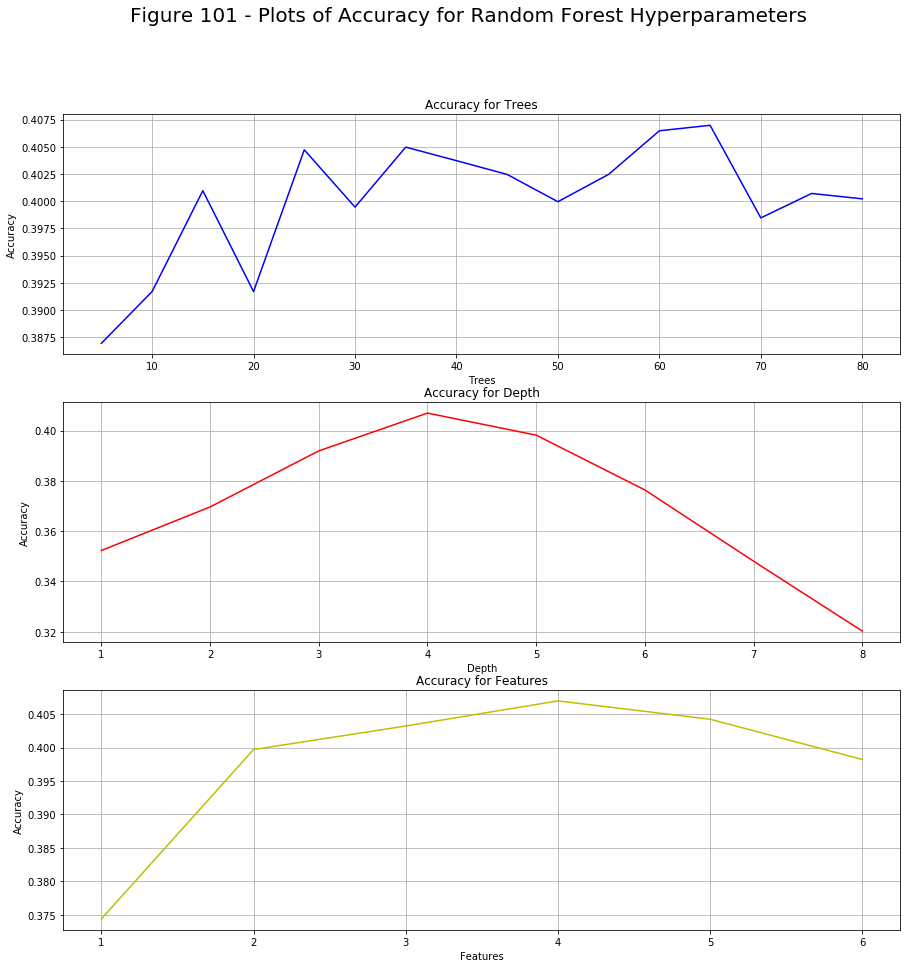

In [24]:
# Dependency on Tree Number:
acc_trees = accuracy_matrix[:, depth_id, features_id]
# Dependency on Depth:
acc_depth = accuracy_matrix[n_estimators_id, :, features_id]
# Dependency on Features:
acc_features = accuracy_matrix[n_estimators_id, depth_id, :]

fig101, axes101 = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # Setting subplots

axes101[0].plot(trees_search, acc_trees, 'b')
axes101[0].set_xlabel("Trees")
axes101[0].set_ylabel("Accuracy")
axes101[0].set_title("Accuracy for Trees")
axes101[0].grid()

axes101[1].plot(depth_search, acc_depth, 'r')
axes101[1].set_xlabel("Depth")
axes101[1].set_ylabel("Accuracy")
axes101[1].set_title("Accuracy for Depth")
axes101[1].grid()

axes101[2].plot(features_search, acc_features, 'y')
axes101[2].set_xlabel("Features")
axes101[2].set_ylabel("Accuracy")
axes101[2].set_title("Accuracy for Features")
axes101[2].grid()

title101 = 'Figure 101 - Plots of Accuracy for Random Forest Hyperparameters'
plt.suptitle(title101, fontsize=20)
plt.savefig(title101  + ".png")
plt.show()

We now present the effect of the various parameters on the training and testing times.

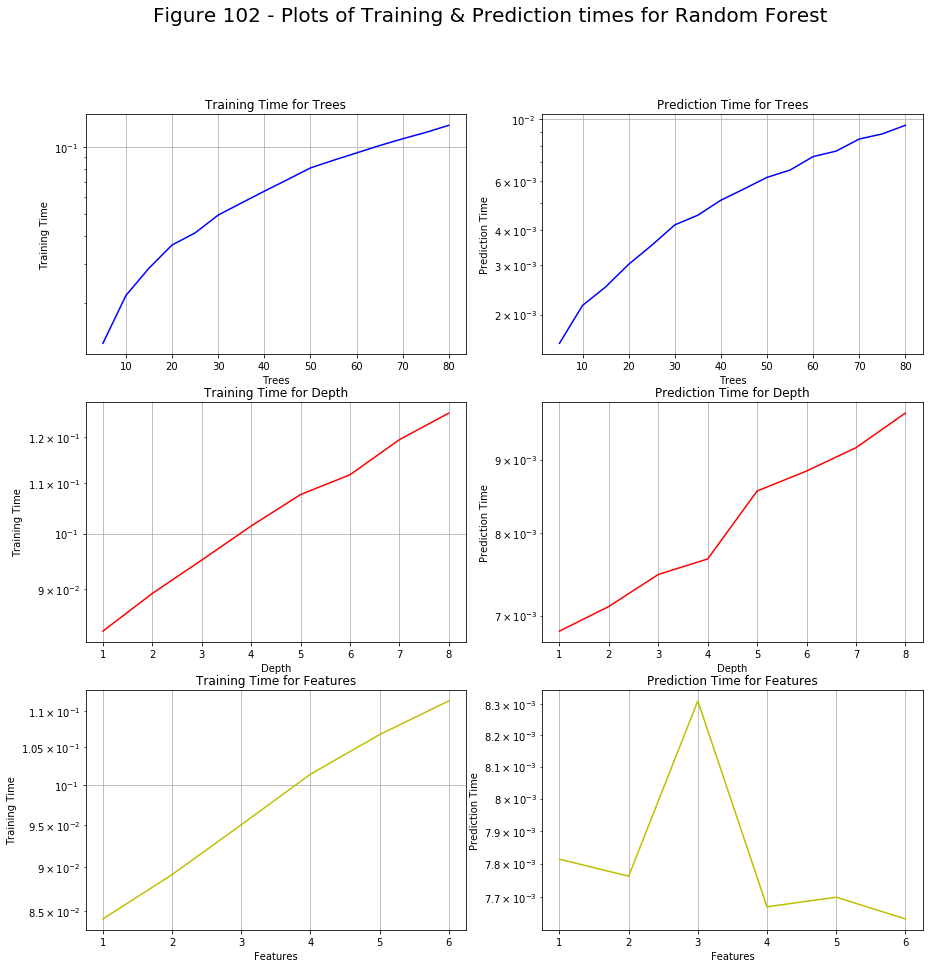

In [25]:
# Plots of time it took for each parameter
# Plots of how accuracy changes for the various different parameters

fig102, axes102 = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Setting subplots

axes102[0, 0].semilogy(trees_search, timing_train_matrix[:, depth_id, features_id], 'b')
axes102[0, 0].set_xlabel("Trees")
axes102[0, 0].set_ylabel("Training Time")
axes102[0, 0].set_title("Training Time for Trees")
axes102[0, 0].grid()

axes102[1, 0].semilogy(depth_search, timing_train_matrix[n_estimators_id, :, features_id], 'r')
axes102[1, 0].set_xlabel("Depth")
axes102[1, 0].set_ylabel("Training Time")
axes102[1, 0].set_title("Training Time for Depth")
axes102[1, 0].grid()

axes102[2, 0].semilogy(features_search, timing_train_matrix[n_estimators_id, depth_id, :], 'y')
axes102[2, 0].set_xlabel("Features")
axes102[2, 0].set_ylabel("Training Time")
axes102[2, 0].set_title("Training Time for Features")
axes102[2, 0].grid()

axes102[0, 1].semilogy(trees_search, timing_predictions_matrix[:, depth_id, features_id], 'b')
axes102[0, 1].set_xlabel("Trees")
axes102[0, 1].set_ylabel("Prediction Time")
axes102[0, 1].set_title("Prediction Time for Trees")
axes102[0, 1].grid()

axes102[1, 1].semilogy(depth_search, timing_predictions_matrix[n_estimators_id, :, features_id], 'r')
axes102[1, 1].set_xlabel("Depth")
axes102[1, 1].set_ylabel("Prediction Time")
axes102[1, 1].set_title("Prediction Time for Depth")
axes102[1, 1].grid()

axes102[2, 1].semilogy(features_search, timing_predictions_matrix[n_estimators_id, depth_id, :], 'y')
axes102[2, 1].set_xlabel("Features")
axes102[2, 1].set_ylabel("Prediction Time")
axes102[2, 1].set_title("Prediction Time for Features")
axes102[2, 1].grid()

title102 = 'Figure 102 - Plots of Training & Prediction times for Random Forest'
plt.suptitle(title102, fontsize=20)
plt.savefig(title102 + ".png")
plt.show()

We now proceed with the optimal Random Forest at least as yielded by our cross-validation of parameters. This is a random forest with 60 decision trees, each of which having a depth of 4, and we select 4 as the number of features to consider when looking for the best split.
- Document the in-sample and out-of-sample performance
- Display the Confusion Matrix for this model

In-Sample Accuracy = 0.4097
Out-of-Sample Accuracy = 0.5837

 Classification report: 

              precision    recall  f1-score   support

         acc       0.53      0.15      0.23       188
        good       0.44      0.51      0.47       204
       unacc       0.69      0.82      0.75       412
       vgood       0.51      0.59      0.54       188

    accuracy                           0.58       992
   macro avg       0.54      0.52      0.50       992
weighted avg       0.58      0.58      0.56       992



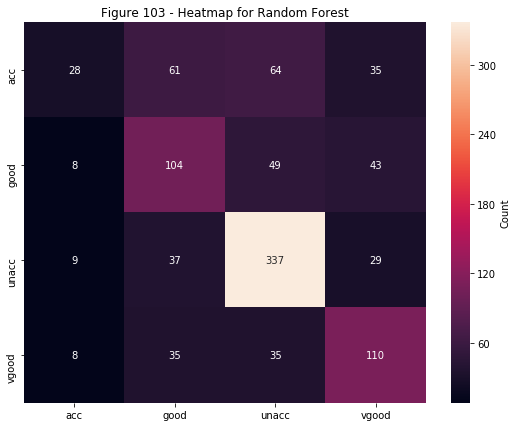

In [141]:
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, max_features=features,
                                               random_state=42)
rfc.fit(X_training_standardised, Y_training_categorical)
Y_insample_pred = rfc.predict(X_training_standardised)
in_sample_acc = sklearn.metrics.accuracy_score(Y_training_categorical, Y_insample_pred)
Y_outsample_pred = rfc.predict(X_test_standardised)
out_sample_acc = sklearn.metrics.accuracy_score(Y_test_categorical, Y_outsample_pred)

print(f"In-Sample Accuracy = {in_sample_acc:.4f}")
print(f"Out-of-Sample Accuracy = {out_sample_acc:.4f}")

print("\n Classification report: \n")
classification_report_rfc = sklearn.metrics.classification_report(Y_test_categorical, Y_outsample_pred)
print(classification_report_rfs)

# HeatMap
df_confusion_rfc = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_categorical, 
                                                                 Y_outsample_pred), 
                                columns=['acc', 'good', 'unacc', 'vgood'],
                                index=['acc', 'good', 'unacc', 'vgood'])

fig103 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_rfc, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})
title103 = "Figure 103 - Heatmap for Random Forest"
plt.title(title103)
plt.savefig(title103 + ".png")
plt.show()

classification_report_rfc = sklearn.metrics.classification_report(Y_test_categorical, Y_outsample_pred, output_dict=True)

##### __Explanation of results in this section__

1. **Overview of Random Forests**:

A random forest is an ensemble learning method for classification. Ensemble methods use a number of algorithms when making predictions, weighing  their outputs to obtain better predictive performance compared with taking an individual from the set of algorithms used.

For the random forest models, an ensemble of Decision Trees is used, and each of these is aggregated to give a single Random Forest predictors. 

A decision tree is a general non-parametric classification method for classification, and they work by splitting the parameter space at each 'split' based on rules. The advantages of decision trees are that they are relatively simple to understand and they are interpretable, as we are able to simply follow the tree to figure out why a certain classification was made. The biggest disadvantage of a decision tree is that they tend to badly overfit to training data, leading to poor performance with unseen data, especially as the depth of the trees increase.

Random forests attempt to solve this issue by taking a random sample of decision trees (aka bagging).

2. **Explanation of choice of best RF model**

The hyperparameter 'number of trees' simply denotes the size of the ensemble of decision trees considered. We expect a well-performing random forest will need to have a sufficient amount of trees to be able to achieve this overfitting reduction effect as outlined above. Increasing the number of trees leads to a better score/accuracy, due to the increased reduction in overfitting. This can be seen from the first subplot of figure 101. However, if the number of trees is too large, the time it takes to train and predict each result is large, because the RF needs to check every tree for the decision. This trade-off leads to the choice of trees which maximises the in-sample accuracy of 40. This parameter does not a very large in performance, as the difference between using 10 trees and 50 trees was only approx 1 percent.

The hyperparamter 'depth' refers to the depth of each decision tree inside of the ensemble. By depth, we mean the number of splits the tree performs with the data. We expect a tree to have an optimal depth, for which it minimises overfitting but still gives meaningful results. Past this depth, the tree will overfit badly, leading to fitting to noise instead of data. This can be seen in the results, as the depth that maximises the accuracy is 4. A depth larger than this, will lead to loss of generality of the model. This parameter has the largest impact on performance in terms of accuracy, as the difference between 4 trees and 10 trees is approximately 11%.

The hyperparameter 'maximum number of descriptors' refers to the number of descriptors to consider at each split. This governs how many features each decision tree considers at each split. Most data will contain irrelevant variables, so by taking a number of descriptors smaller than the total number of descriptors in the dataset we decrease the chance that the tree will be making splitting decision based on the irrelevant pieces of information. From the 'Feature Importance' table above, we see that the two least important factors, namely number of doors and size of luggage have very low importances. It is not a coincidence, then, that the optimal RF model considers a maximum of 4 descriptors as seen in Figure 101, minimising the chance that decisions will be made on these two less relevant features.  
***


### Task 2: Support Vector Machines
***

In this task, we implement Support Vector Machines using the following Kernel functions varying the following parameters:

The support vector machine attempts to classify the data by creating boundaries (and therefore classes) in the parameter space to separate the variables and then classify the data according to in which class they are. In the case of the linear SVM, these boundaries are straight lines. For linearly non-separable variables a linear boundary will not suffice, and the need for more complex, non-linear boundaries comes in.

Kernels provide this solution, achieved by letting the classic inner product of vectors be modified to a kernel function $K(x,y) = \langle \varphi(x), \varphi(y) \rangle$
. A kernel can be thought of as a function which maps some non-linearly-separable points in a lower dimensional space to a higher dimensional space, where they become linearly separable. A classic example of this is where data are arranged in concentric circles in 2D. If one of those circles were to be 'lifted' out of the plane, then a linear boundary can be found in 3D space that separates these circles.

1. Linear kernel - Parameter: C (penalty parameter)
2. Polynomial kernel - Parameters: C (penalty parameter), Degree (degree of polynomial), Gamma (Kernel Coeff.), C_0 (Intercept Coefficient)
3. RBF (Gaussian) kernel - Parameters: C (penalty parameter), Gamme (Kernel Coeff.) 

__(i) Linear SVM Cross-Validation__

In [27]:
# Linear SVM Parameter Search (Cross-Validation):
C_search = np.logspace(-3, 2, 50, base=10.0)
linear_svm_accuracy_array = np.zeros(C_search.shape[0])

for i, c in enumerate(C_search):
    for l in range(5):
        svm_linear = sklearn.svm.SVC(C=c, kernel='linear', random_state=42)
        svm_linear.fit(Xtrain[l], Ytrain[l])
        acc = svm_linear.score(Xval[l], Yval[l])
        linear_svm_accuracy_array[i] += acc
        if display:
            clear_output(wait=True)
            print("GRID SEARCH LINEAR SVM:")
            print()
            print(f"C = {c}")
            print(f"K-Fold k = {l+1}")
            print(f"Current Accuracy = {round(acc, 2)*100}%")
linear_svm_accuracy_array /= 5

GRID SEARCH LINEAR SVM:

C = 100.0
K-Fold k = 5
Current Accuracy = 37.0%


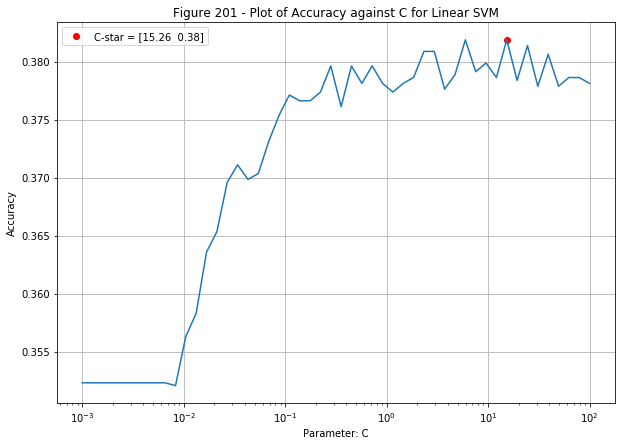

In [28]:
fig201 = plt.figure(figsize=(10, 7))

C_star = (C_search[np.argmax(linear_svm_accuracy_array)], np.max(linear_svm_accuracy_array))
plt.plot(C_star[0], C_star[1], 'ro', label=f"C-star = {np.round(C_star, 2)}")
plt.semilogx(C_search, linear_svm_accuracy_array)
plt.ylabel("Accuracy")
plt.xlabel("Parameter: C")
plt.legend()
plt.grid()
title201 = "Figure 201 - Plot of Accuracy against C for Linear SVM"
plt.title(title201)
plt.savefig(title201 + ".png")
plt.show()

Out-of-sample Accuracy = 0.5151209677419355

 Classification Report for Linear SVM with C = 15.26 

              precision    recall  f1-score   support

         acc       0.23      0.03      0.05       188
        good       0.35      0.44      0.39       204
       unacc       0.60      0.83      0.69       412
       vgood       0.54      0.39      0.45       188

    accuracy                           0.52       992
   macro avg       0.43      0.42      0.40       992
weighted avg       0.46      0.52      0.46       992



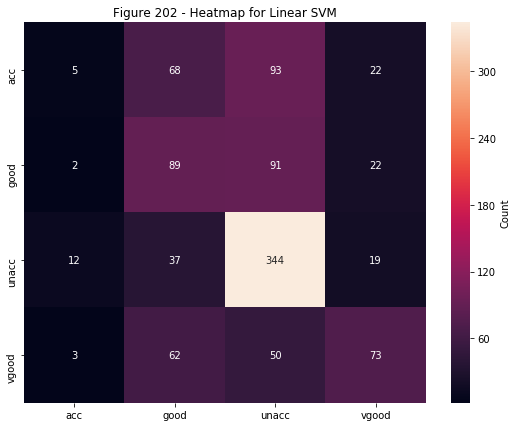

In [130]:
# Fitting this Linear SVM to the whole training data, then computing the out-of-sample error:
svm_linear = sklearn.svm.SVC(C=C_star[0], kernel='linear', random_state=42)
svm_linear.fit(X_training_standardised, Y_training_categorical)
print(f"Out-of-sample Accuracy = {svm_linear.score(X_test_standardised, Y_test_categorical)}")
print(f"\n Classification Report for Linear SVM with C = {C_star[0]} \n")
Ypred = svm_linear.predict(X_test_standardised)

classification_report_linear_svm = sklearn.metrics.classification_report(Y_test_categorical, Ypred)
print(classification_report_linear_svm)
df_confusion_svm_linear = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_categorical, Ypred), 
                                       columns=['acc', 'good', 'unacc', 'vgood'], 
                                       index=['acc', 'good', 'unacc', 'vgood'])

fig202 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_svm_linear, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})
title202 = "Figure 202 - Heatmap for Linear SVM"
plt.title(title202)
plt.savefig(title202 + ".png")
plt.show()

__Discussion of the Linear Kernel SVM__

A linear kerneled SVM is a support vector machine where its inner product function is the usual one, and can only form linear boundaries.

The parameter C constrains the SVM optimization by affecting the width of the hyperplane that forms the boundary between planes, i.e. the distance between the hyperplane and the nearest set of points in the parameter space. For small C, the width will be large, and so the hyperplane fitting will be constrained, therefore performing poorly even on linearly separable data. For large C, the width of the hyperplane will be small, relaxing the constraint. In our case, the optimal choice of C for the Linear SVM is approx 15, whoever, there is a lot of noise, so the actual optimal C may be within some range of this value.

Overall, this model does not give a good out-of-sample accuracy, providing some evidence that the boundaries are non-linear.

__(ii) Polynomial SVM Cross-Validation__

The SVM with a polynomial kernel replaces the classic inner product with the following:$$K(x,y) = (x^\mathsf{T} y + c_0)^{d}$$
This kernel allows for non-linear boundaries in the parameter space. The coefficient d is the degree of the kernel polynomial and the coefficient $c_0$ is a hyperparameter that may be adjusted to account for the influence of higher-order v. low-order terms of the polynomial.

For this SVM, we will vary the parameters individually, neglecting any dependences in between the parameters, as it would require too much computational time to perform an in-depth grid search of the parameter space. The caveat of this approach is obtaining a localised maximum as opposed to the global maximum in the accuracy space. 

In [35]:
G_search = np.logspace(-2, 0, 30, base=10.0)
C_search = np.logspace(-2, 0, 30, base=10.0)
D_search = np.arange(2, 10)
C0_search = np.linspace(-10, 10, 21)

# Perform G search
acc_g = 0
acc_g_array = np.zeros(G_search.shape[0])
for i, g in enumerate(G_search):
    acc = 0
    for k in range(5):
        svm_poly = sklearn.svm.SVC(kernel='poly', gamma=g, random_state=42)
        svm_poly.fit(Xtrain[k], Ytrain[k])
        acc += svm_poly.score(Xval[k], Yval[k])
    acc /= 5
    acc_g_array[i] = acc
    print(f"G = {round(g, 3)}, accuracy = {round(acc, 2)}")
    if acc > acc_g:
        g_star = g
        acc_g = acc
        
# Perform C search:
acc_c = 0
acc_c_array = np.zeros(C_search.shape[0])
for i, c in enumerate(G_search):
    acc = 0
    for k in range(5):
        svm_poly = sklearn.svm.SVC(kernel='poly', C=c, random_state=42, gamma='scale')
        svm_poly.fit(Xtrain[k], Ytrain[k])
        acc += svm_poly.score(Xval[k], Yval[k])
    acc /= 5
    acc_c_array[i] = acc
    print(f"C = {round(c, 3)}, accuracy = {round(acc, 2)}")
    if acc > acc_c:
        c_star = c
        acc_c = acc
        
# Perform degree search:
acc_d = 0
acc_d_array = np.zeros(D_search.shape[0])
for i, d in enumerate(D_search):
    acc = 0
    for k in range(5):
        svm_poly = sklearn.svm.SVC(kernel='poly', degree=d, random_state=42, gamma='scale')
        svm_poly.fit(Xtrain[k], Ytrain[k])
        acc += svm_poly.score(Xval[k], Yval[k])
    acc /= 5
    acc_d_array[i] = acc
    print(f"Degree = {round(d, 3)}, accuracy = {round(acc, 2)}")
    if acc > acc_d:
        d_star = d
        acc_d = acc
        
# Perform degree search:
acc_c0 = 0
acc_c0_array = np.zeros(C0_search.shape[0])
for i, c0 in enumerate(C0_search):
    acc = 0
    for k in range(5):
        svm_poly = sklearn.svm.SVC(kernel='poly', coef0=c0, random_state=42, gamma='scale')
        svm_poly.fit(Xtrain[k], Ytrain[k])
        acc += svm_poly.score(Xval[k], Yval[k])
    acc /= 5
    acc_c0_array[i] = acc
    print(f"C0 = {round(c0, 3)}, accuracy = {round(acc, 2)}")
    if acc > acc_c0:
        c0_star = c0
        acc_c0 = acc

clear_output(wait=True)
print("Finished Optimising for parameters:")
print("RESULTS:")
print(f"G* = {g_star}")
print(f"C* = {c_star}")
print(f"Optimal degree = {d_star}")
print(f"C0* = {c0_star}")

Finished Optimising for parameters:
RESULTS:
G* = 0.10826367338740546
C* = 0.32903445623126676
Optimal degree = 3
C0* = 3.0


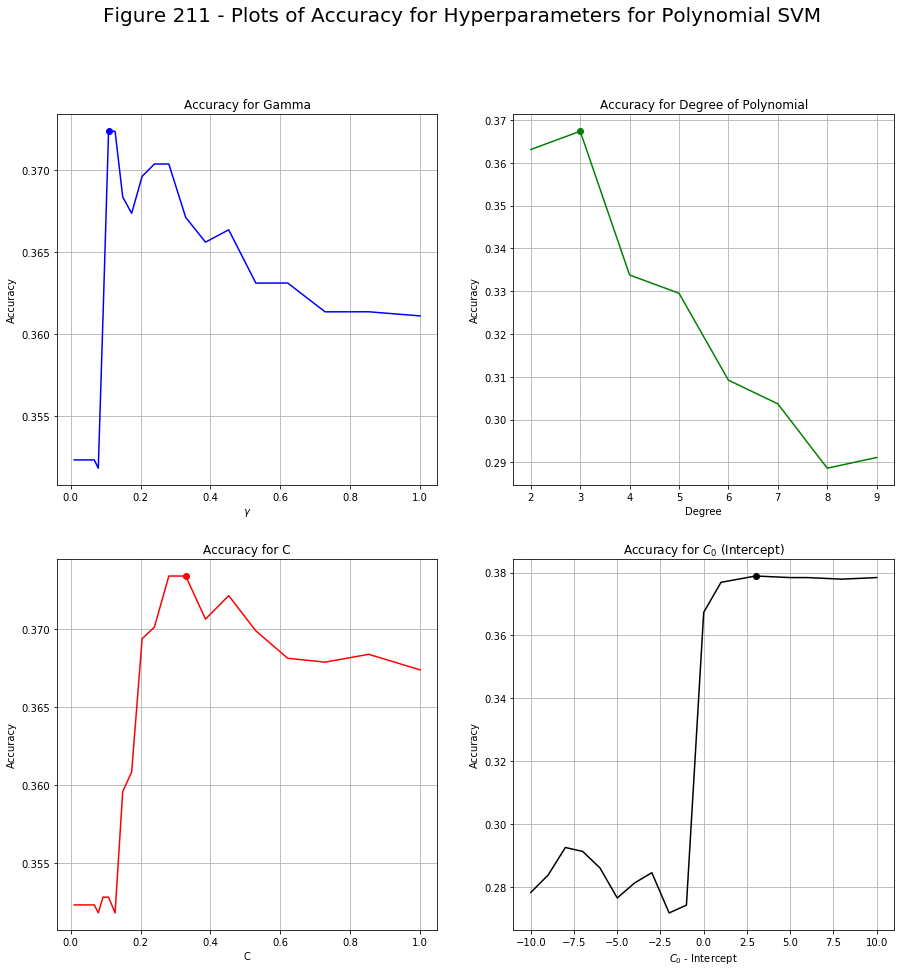

In [36]:
# 4 Subplots of accuracy against many variables:
# Plots of time it took for each parameter
# Plots of how accuracy changes for the various different parameters

fig211, axes211 = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))  # Setting subplots

axes211[0, 0].plot(G_search, acc_g_array, 'b')
axes211[0, 0].plot(g_star, acc_g, 'bo')
axes211[0, 0].set_xlabel(r"$\gamma$")
axes211[0, 0].set_ylabel("Accuracy")
axes211[0, 0].set_title("Accuracy for Gamma")
axes211[0, 0].grid()

axes211[1, 0].plot(C_search, acc_c_array, 'r')
axes211[1, 0].plot(c_star, acc_c, 'ro')
axes211[1, 0].set_xlabel("C")
axes211[1, 0].set_ylabel("Accuracy")
axes211[1, 0].set_title("Accuracy for C")
axes211[1, 0].grid()

axes211[0, 1].plot(D_search, acc_d_array, 'g')
axes211[0, 1].plot(d_star, acc_d, 'go')
axes211[0, 1].set_xlabel("Degree")
axes211[0, 1].set_ylabel("Accuracy")
axes211[0, 1].set_title("Accuracy for Degree of Polynomial")
axes211[0, 1].grid()

axes211[1, 1].plot(C0_search, acc_c0_array, 'k')
axes211[1, 1].plot(c0_star, acc_c0, 'ko')
axes211[1, 1].set_xlabel(r"$C_0$ - Intercept")
axes211[1, 1].set_ylabel("Accuracy")
axes211[1, 1].set_title(r"Accuracy for $C_0$ (Intercept)")
axes211[1, 1].grid()

title211 = "Figure 211 - Plots of Accuracy for Hyperparameters for Polynomial SVM"
plt.suptitle(title211, fontsize=20)
plt.savefig(title211 + ".png")
plt.show()

Out-of-sample Accuracy = 0.6028225806451613

 Classification Report for Polynomial SVM with C = 0.32903445623126676 	 G = 0.3290344563126676 
 Degree = 3 	 C0 = 3.0 

              precision    recall  f1-score   support

         acc       0.45      0.40      0.42       188
        good       0.49      0.40      0.44       204
       unacc       0.75      0.81      0.78       412
       vgood       0.51      0.59      0.54       188

    accuracy                           0.60       992
   macro avg       0.55      0.55      0.55       992
weighted avg       0.59      0.60      0.60       992



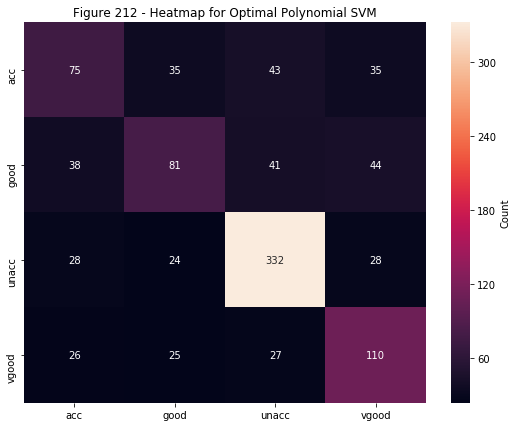

In [128]:
c_star = 0.32903445623126676
g_star = 0.3290344563126676
d_star = 3
coef0 = 3.0

# Fitting this Polynomial SVM to the whole training data, then computing the out-of-sample error:
svm_poly = sklearn.svm.SVC(kernel='poly', C=c_star, gamma=g_star, degree=d_star, coef0=c0_star, random_state=42)
svm_poly.fit(X_training_standardised, Y_training_categorical)
print(f"Out-of-sample Accuracy = {svm_poly.score(X_test_standardised, Y_test_categorical)}")
print(f"\n Classification Report for Polynomial SVM with C = {c_star} \t G = {g_star} \n Degree = {d_star} \t C0 = {c0_star} \n")
Ypred = svm_poly.predict(X_test_standardised)

classification_report_svm_poly = sklearn.metrics.classification_report(Y_test_categorical, Ypred)
print(classification_report_svm_poly)
df_confusion_svm_poly = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_categorical, Ypred), 
                                     columns=['acc', 'good', 'unacc', 'vgood'], 
                                     index=['acc', 'good', 'unacc', 'vgood'])
fig212 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_svm_poly, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})

title212 = "Figure 212 - Heatmap for Optimal Polynomial SVM"
plt.title(title212)
plt.savefig(title212 + ".png")
plt.show()

__Discussion of Polynomial Kernel SVM__

From the search of parameters, we see that the parameter with largest influence is the degree of the kernel polynomial. From figure 211, we see that a cubic polynomial kernel fits best, and for degrees higher than 3, the accuracy drops dramatically after cross-validation. This can be attributed to the fact that as d is the exponent in the Kernel equation $K(x,y) = (x^\mathsf{T} y + c_0)^{d}$, it is naturally the most powerful parameter in the equation. For polynomials of high degrees, the boundaries of the SVM hyperplanes become highly non-linear to the point of overfitting to the training data, hence explaining the drop in accuracy.



__RBF (Gaussian) SVM Cross-Validation__

The radial basis function kernel, or RBF kernel, is the kernel $ K(x,y) = \exp (-\gamma \| x - y \| ^{2})$, where $\gamma = \sigma ^{-2}$. The parameter gamma controls how 'tightly' one can fit to the data.






In [32]:
# RBF SVM Parameter Search (Cross-Validation):
C_search = np.logspace(-3, 2, 30, base=10.0)
G_search = np.logspace(-5, 2, 30, base=10.0)
rbf_svm_accuracy_array = np.zeros([C_search.shape[0], G_search.shape[0]])

for i, c in enumerate(C_search):
    for j, g in enumerate(G_search):
        for l in range(5):
            svm_rbf = sklearn.svm.SVC(C=c, kernel='rbf', gamma=g, random_state=42)
            svm_rbf.fit(Xtrain[l], Ytrain[l])
            acc = svm_rbf.score(Xval[l], Yval[l])
            rbf_svm_accuracy_array[i, j] += acc
            if display:
                clear_output(wait=True)
                print("GRID SEARCH RBF SVM:")
                print()
                print(f"C = {c}")
                print(f"Gamma = {g}")
                print(f"K-Fold k = {l+1}")
                print(f"Current Accuracy = {round(acc, 2)*100}%")
rbf_svm_accuracy_array /= 5

GRID SEARCH RBF SVM:

C = 100.0
Gamma = 100.0
K-Fold k = 5
Current Accuracy = 22.0%


In [72]:
idx_max_accuracy = np.unravel_index(np.argmax(rbf_svm_accuracy_array, axis=None),
                                    rbf_svm_accuracy_array.shape)
star_point = rbf_svm_accuracy_array[idx_max_accuracy]
C_star = C_search[idx_max_accuracy[1]]
G_star = G_search[idx_max_accuracy[0]]

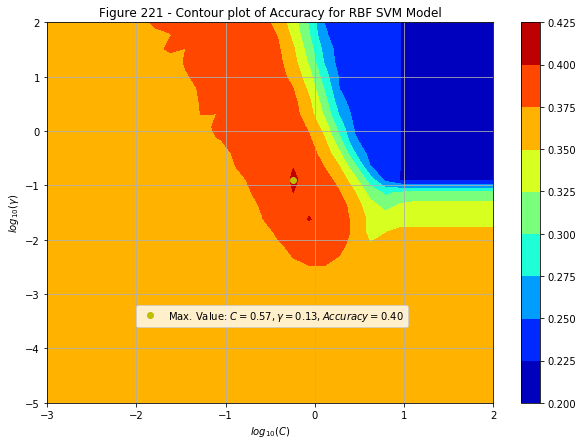

In [73]:
# Contour plot of parameters:
fig221 = plt.figure(figsize=(10, 7))
plt.contourf(np.log10(C_search), np.log10(G_search), rbf_svm_accuracy_array, cmap=matplotlib.cm.jet)
plt.plot(np.log10(C_star), np.log10(G_star), 'yo', label=rf"Max. Value: $C={C_star:.2f}, \gamma={G_star:.2f}, Accuracy = {star_point:.2f}$")

plt.xlabel(r"$log_{10}(C)$")
plt.ylabel(r"$log_{10}(\gamma)$")
plt.legend(loc=[0.2, 0.2])
plt.colorbar()
plt.grid()

title221 = "Figure 221 - Contour plot of Accuracy for RBF SVM Model"
plt.title(title221)
plt.savefig(title221 + ".png")
plt.show()

Out-of-sample Accuracy = 0.6098790322580645

 Classification Report for Linear SVM with C = 0.5736152510448681 	 G = 0.12689610031679235  

              precision    recall  f1-score   support

         acc       0.53      0.28      0.36       188
        good       0.49      0.51      0.50       204
       unacc       0.71      0.82      0.76       412
       vgood       0.54      0.58      0.56       188

    accuracy                           0.61       992
   macro avg       0.57      0.55      0.55       992
weighted avg       0.60      0.61      0.59       992



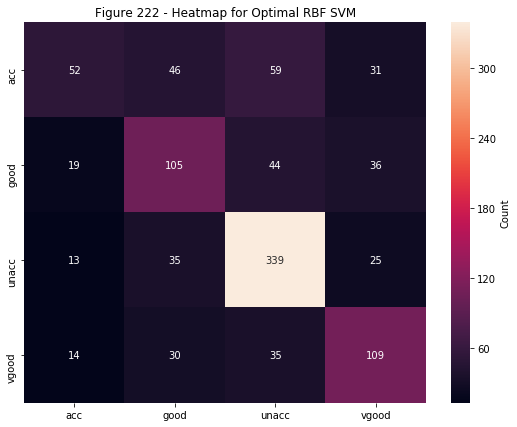

In [146]:
# Fitting this RBF SVM to the whole training data, then computing the out-of-sample error:
svm_rbf = sklearn.svm.SVC(C=C_star, kernel='rbf', gamma=G_star, random_state=42)
svm_rbf.fit(X_training_standardised, Y_training_categorical)
print(f"Out-of-sample Accuracy = {svm_rbf.score(X_test_standardised, Y_test_categorical)}")
print(f"\n Classification Report for Linear SVM with C = {C_star} \t G = {G_star}  \n")
Ypred = svm_rbf.predict(X_test_standardised)

classification_report_svm_rbf = sklearn.metrics.classification_report(Y_test_categorical, Ypred)
print(classification_report_svm_rbf)
df_confusion_svm_rbf = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_categorical, Ypred), 
                                       columns=['acc', 'good', 'unacc', 'vgood'], 
                                       index=['acc', 'good', 'unacc', 'vgood'])

fig222 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_svm_rbf, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})
title222 = "Figure 222 - Heatmap for Optimal RBF SVM"
plt.title(title222)
plt.savefig(title222 + ".png")
plt.show()

classification_report_svm_rbf = sklearn.metrics.classification_report(Y_test_categorical, Ypred, output_dict=True)

__Discussion of RBF SVM__

The RBF SVM model performs best for $\gamma=0.13, C=0.57$, with an training accuracy of 0.40 and an out-of-sample accuracy of 0.61. Gamma and C act as constraints in the RBF SVM. From the contour plot of Figure 221, we can see that the relevant values for gamma are between 0.01 and 1 and for C between 0.01 and 1 as well. For values outside of this range, the accuracy becomes very low/non changing.

__Final choice of Model__

From the results above, we can see that the Linear SVM performs poorly on the test data, being outperformed by both the Polynomial and the RBF SVMs. This suggests that the input data is non-linearly separable. 

Having maximised the accuracy, and having the best performance with respect to the confusion matrices, the RBF model is the best performing SVM model in this section.


### Task 3: Neural Networks
***

We begin this task by defining the neural network used for this task, it will have the following architecture:
- Two hidden layers, each with 200 neurons.
- The activation function of each hidden layer is ReLU (Rectified Linear Unit), which defined as $Y = \max(0, X)$, where $X$ are the descriptors, and $Y$ are the observables.
- The optimisation method is SGD (Stochastic Gradient Descent)
- Cross-entropy is used as our loss.
- Dropout regularisation is implemented in the second layer of the Neural Network. This will help prevent overfitting to the data by randomly switching off neurons with probability equal to the dropout rate. We can set p=0 to retrieve the default neural network without dropout.

In [75]:
class NeuralNet1(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, drop_prob):
        super(NeuralNet1, self).__init__()
        self.drop_prob = drop_prob
        self.fc1 = torch.nn.Linear(input_size, hidden_size)  # First hidden layer
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size)  # Second hidden layer        
        self.fc3 = torch.nn.Linear(hidden_size, num_classes)  # Output layer
        
    def forward(self, x):
        """ Computes the forward pass of the neural network"""
        out = torch.nn.functional.relu(self.fc1(x))  # ReLU of first layer
        out = torch.nn.functional.relu(self.fc2(out))  # ReLU of second layer
        out = torch.nn.functional.dropout(out, p=self.drop_prob, training=self.training)  # Dropout in second layer
        out = self.fc3(out)  # Output layer
        return out

We now proceed to convert our data into PyTorch Tensors:
- A tensor is an algebraic object that describes a linear mapping. This mapping can be thought as the
  generalisation of a matrix. 
- The tensor needs to be converted using PyTorch's data constructor, and it needs to be stored either as a CPU tensor
  or a GPU tensor.
- The CPU stands for the Central Processing Unit of a computer. The GPU stands for the Graphical Processing Unit of
  a computer. The CPU is the 'brains' of a computer, capable of handling general tasks. It is characterised as having relatively few cores, but each of these is powerful. The GPU is less general, but it is able to handle specific tasks very fast, i.e. it is a specialised processor. This is due to the design of it, as it contains many times more cores than a CPU, each of which may not be as powerful, but they are able to handle specific tasks efficiently and when put together they are able to parallelise tasks very efficiently.
- PyTorch contains can handle operations with either the CPU or the GPU, however, generally one wishes to use the GPU for specialised tasks (such as computing gradients) when training neural networks, therefore, if a GPU is available, our code will run on it.

In [76]:
class TorchData():
    def __init__(self, mode="GPU"):
        self.mode = mode
        # Loading into appropriate device
        if mode == "GPU":
            if torch.cuda.is_available():
                self.device = torch.device('cuda')
                self.device_id = torch.cuda.current_device()
                self.device_name = torch.cuda.get_device_name(self.device_id)
            else:
                print("GPU not available - using CPU instead...")
                self.device = torch.device('cpu')
                self.device_name = "CPU"
        elif mode == "CPU":
            self.device = torch.device('cpu')
            self.device_name = "CPU"
        else:
            raise Exception("Device is not valid!")

    def torch_np(self, dt):
        """ Converts Numpy arrays into PyTorch tensors."""
        return torch.from_numpy(dt)
    
    def send_to_gpu(self, dt):
        """ Sends data to the GPU if it is available."""
        if self.mode == "GPU":
            return dt.to('cuda', non_blocking=True)
        else:
            return dt

In [77]:
# Creating an instance of the class and checking it all works properly
TD = TorchData(mode="CPU")
print(f"Device used - {TD.device_name}")

Device used - CPU


We now define a class called 'Computations'. This class performs training, evaluation and computes various parameters.

In [78]:
class Computations:
    def __init__(self, net, tot_epochs, criterion, optimiser, display_train=True, display_test=True):
        self.net = net
        self.tot_epochs = tot_epochs
        self.optimiser = optimiser
        self.criterion = criterion
        self.display_train = display_train
        self.display_test = display_test

    def fit(self, train_loader):
        """ Fitting the data to the Neural Network (Training)"""
        t1 = time.perf_counter()
        self.net.train()  # Toggling training mode ON
        loss_vals= []
        for epoch in range(self.tot_epochs + 1):
            # Perform batches:
            current_loss = []
            for i, (features, labels) in enumerate(train_loader):            
                outputs = self.net(features)  # Generate Predictions
                loss = self.criterion(outputs, labels)  # Compute loss
                self.optimiser.zero_grad()  # Resetting gradients
                loss.backward()  # Computing gradients
                self.optimiser.step()  # Update parameters      
                current_loss.append(loss.item())
                
            # Computing loss by averaging over the batches (i.e. dividing by number of batches)
            current_loss = np.mean(current_loss)
            # Print statistics at each epoch
            if self.display_train:
                print(f"Epoch [{epoch}/{self.tot_epochs}] --- Training Loss: {(current_loss):.6f}")
            loss_vals.append(current_loss)
        t2 = time.perf_counter()
        print(f"Training completed in {(t2 - t1):.4f} seconds")
        return loss_vals, (t2 - t1)

    def test_model_accuracy(self, test_loader):
        self.net.eval()  # Toggling training OFF
        total_labels, correct_labels = (0, 0)
        predicted_labels = []
        for features, labels in test_loader:
            outputs = self.net(features)
            _, preds = torch.max(outputs.data, 1)
            total_labels += labels.size(0)
            correct_labels += (preds == labels).sum().item()
            predicted_labels = predicted_labels + preds.tolist()
        accuracy = (100*correct_labels/total_labels)
        if self.display_test:
            print(f"Accuracy attained = {accuracy:.3f}%")
        self.net.train()  # Toggling training ON
        return accuracy, predicted_labels

We now need to replace our categorical labels with numerical ones indexed at 0:


In [79]:
# Splitting into descriptors and labels
Y_training_nn = Y_training_categorical.replace({'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3})
X_training_nn = X_training_standardised.copy()
Y_test_nn = Y_test_categorical.replace({'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3})
X_test_nn = X_test_standardised.copy()
X_training_nn.head()

,buying,maint,doors,persons,lug_boot,safety
0,-1.022463,-0.174267,-0.551239,-0.366231,-1.434981,0.876891
1,1.515451,1.698982,-1.477245,-1.753248,-1.434981,-1.842425
2,-0.176491,-0.174267,1.300775,-0.366231,-0.163551,0.876891
3,-1.022463,-0.174267,-0.551239,-0.366231,-1.434981,0.876891
4,1.515451,1.698982,-1.477245,-1.753248,-1.434981,-1.842425


We proceed to split our training data into 5-Folds for cross-validation and load them into specific PyTorch DataLoaders

In [90]:
def create_loaders(batch_size, X_training_nn, Y_training_nn, X_test_nn, Y_test_nn):
    skf = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    skf_split = skf.split(np.asarray(X_training_nn), np.asarray(Y_training_nn))
    K_folds_train_loaders, K_folds_val_loaders = ([], [])  # Creating placeholder lists to perform K-Folds
    skf_split = skf.split(np.asarray(X_training_nn), np.asarray(Y_training_nn))

    # Looping through the K-Folds
    for train_index, val_index in skf_split:
        Xtrain = TD.send_to_gpu(TD.torch_np(np.asarray(X_training_nn.iloc[train_index])).float())
        Ytrain = TD.send_to_gpu(TD.torch_np(np.asarray(Y_training_nn.iloc[train_index])).long())
        Xval = TD.send_to_gpu(TD.torch_np(np.asarray(X_training_nn.iloc[val_index])).float())
        Yval = TD.send_to_gpu(TD.torch_np(np.asarray(Y_training_nn.iloc[val_index])).long())

        # Create dataloaders
        train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(Xtrain, Ytrain), 
                                                   batch_size=batch_size, shuffle=False)
        val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(Xval, Yval), 
                                                 batch_size=batch_size, shuffle=False)

        K_folds_train_loaders.append(train_loader)
        K_folds_val_loaders.append(val_loader)

    # Creating a separate loader for whole training dataset + test dataset
    Xtrain = TD.send_to_gpu(TD.torch_np(np.asarray(X_training_nn)).float())
    Ytrain = TD.send_to_gpu(TD.torch_np(np.asarray(Y_training_nn)).long())
    Xtest = TD.send_to_gpu(TD.torch_np(np.asarray(X_test_nn)).float())
    Ytest = TD.send_to_gpu(TD.torch_np(np.asarray(Y_test_nn)).long())

    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(Xtrain, Ytrain), 
                                               batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(Xtest, Ytest), 
                                              batch_size=batch_size, shuffle=False)
    return (K_folds_train_loaders, K_folds_val_loaders, train_loader, test_loader)

We are now ready to perform some analysis on the Neural Network. We begin by initialising parameters:

In [106]:
# Fixed constants of the model
input_size = 6  # 6 descriptors per iteration
hidden_size = 200  # 200 neurons for the two hidden layers
num_classes = 4  # Number of class outputs - 4 in this case: unacc, acc, good, vgood
num_epochs = 120  # Number of epochs for training, i.e. every time we compute the loss for ALL datapoints in the training

# Initial parameters
batch_size = 64
learning_rate = 0.01


# Retrieving data loaders for training:
K_folds_train_loaders, K_folds_val_loaders, train_loader, test_loader = create_loaders(batch_size, X_training_nn, Y_training_nn, X_test_nn, Y_test_nn)

__3.0 Implementing the Neural Network__


In [107]:
# Network without optimised dropout:
learning_rate_optimal = 0.01

net_no_dropout = NeuralNet1(input_size, hidden_size, num_classes, drop_prob=0)  # instance
net_no_dropout = TD.send_to_gpu(net_no_dropout)  # sending to gpu
criterion = torch.nn.CrossEntropyLoss()  # criterion function
optimiser = torch.optim.SGD(net_no_dropout.parameters(), lr=learning_rate_optimal)  # optimiser
C = Computations(net_no_dropout, num_epochs, criterion, optimiser, display_train=False)  # computations
loss_vals_no_dropout, t_diff_no_dropout = C.fit(train_loader)  # Training
acc_in_sample_net_no_dropout, predicted_labels_train_no_dropout = C.test_model_accuracy(train_loader)  # Evaluating in-sample
acc_out_sample_net_no_dropout, predicted_labels_test_no_dropout = C.test_model_accuracy(test_loader)  # Evaluating out-of-sample

Training completed in 26.5745 seconds
Accuracy attained = 40.973%
Accuracy attained = 56.754%


              precision    recall  f1-score   support

         acc       0.46      0.22      0.29       188
        good       0.47      0.38      0.42       204
       unacc       0.62      0.83      0.71       412
       vgood       0.55      0.54      0.54       188

    accuracy                           0.57       992
   macro avg       0.52      0.49      0.49       992
weighted avg       0.54      0.57      0.54       992



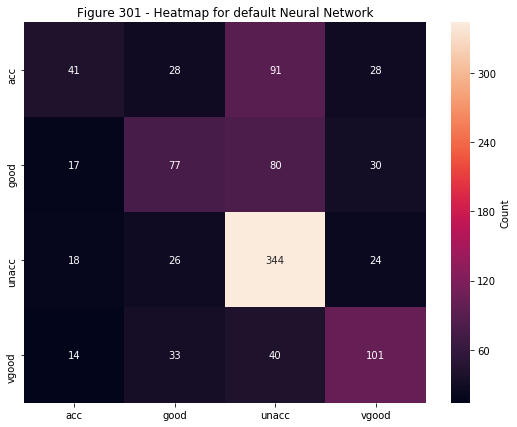

In [108]:
classification_report_nn_no_dropout = sklearn.metrics.classification_report(Y_test_nn, np.array(predicted_labels_test_no_dropout), target_names=['acc', 'good', 'unacc', 'vgood'])
print(classification_report_nn_no_dropout)
df_confusion_nn_no_dropout = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_nn, 
                                                                        np.array(predicted_labels_test_no_dropout)), 
                                       columns=['acc', 'good', 'unacc', 'vgood'], 
                                       index=['acc', 'good', 'unacc', 'vgood'])

fig301 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_nn_no_dropout, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})

title301 = "Figure 301 - Heatmap for default Neural Network"
plt.title(title301)
plt.savefig(title301 + ".png")
plt.show()

__3.1 - We now explore fitting the model using a learning rate of (i) 0.0005 and (ii) 0.95:__

In [94]:
# Case (i)
net311 = TD.send_to_gpu(NeuralNet1(input_size, hidden_size, num_classes, drop_prob=0))
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net311.parameters(), lr=0.0005)
C = Computations(net311, num_epochs, criterion, optimiser, display_train=False, display_test=True)
loss_vals_net311, t_diff_nn311 = C.fit(train_loader)
print("Accuracies for in-sample, out-of-sample learning rate = 0.0005")
acc_in_sample_net311, predicted_labels_train_net311 = C.test_model_accuracy(train_loader)
acc_out_sample_net311, predicted_labels_test_net311 = C.test_model_accuracy(test_loader)

print()
print("----------------")
print()

# Case (ii)
net312 = NeuralNet1(input_size, hidden_size, num_classes, drop_prob=0)
net312 = TD.send_to_gpu(net312)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net312.parameters(), lr=0.95)
C = Computations(net312, num_epochs, criterion, optimiser, display_train=False, display_test=display)
loss_vals_net312, t_diff_nn312 = C.fit(train_loader)
print("Accuracies for in-sample, out-of-sample learning rate = 0.95")
acc_in_sample_net312, predicted_labels_train_net312 = C.test_model_accuracy(train_loader)
acc_out_sample_net312, predicted_labels_test_net312 = C.test_model_accuracy(test_loader)

Training completed in 24.0668 seconds
Accuracies for in-sample, out-of-sample learning rate = 0.0005
Accuracy attained = 37.813%
Accuracy attained = 48.992%

----------------

Training completed in 24.7400 seconds
Accuracies for in-sample, out-of-sample learning rate = 0.95
Accuracy attained = 42.653%
Accuracy attained = 52.722%


The learning rate of the SGD optimiser governs the amount the model changes in gradient when error is estimated when the model weights are updated. This hyperparameter is responsible for the speed of convergence in the algorithm, i.e. the rate of change of loss at every epoch.

The following results are backed by Figure 331 a few cells below:

A small learning rate will mean that the model reaches a minimum in gradient more precisely, but it takes a lot longer to converge, requiring more epochs to train. It also means that there is a higher chance of reaching a local minimum instead of a global minimum. This can be seen in the figure 331, but also by the fact that the out-of-sample accuracy attained of 51% is lower than that of the optimal model with learning rate 0.01, suggesting that the model has not converged, requiring more epochs to train. A large learning rate will mean that the model converges fast, but it may not be able to achieve a global minimum if it 'bounces' around the gradient space too much. This can be seen in the graph of the learning rate=0.95 in figure 331, as we can see the loss drops fast, but then it experiences more variability than before.

__3.2 - We now explore fitting the model using a batch size of (i) 2 and (ii) 256__

In [95]:
learning_rate = 0.01

# Case (i)
K_folds_train_loaders, K_folds_val_loaders, train_loader, test_loader = create_loaders(2, X_training_nn, Y_training_nn, X_test_nn, Y_test_nn)
net321 = NeuralNet1(input_size, hidden_size, num_classes, drop_prob=0)
net321 = TD.send_to_gpu(net321)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net321.parameters(), lr=learning_rate)
C = Computations(net312, num_epochs, criterion, optimiser, display_train=False, display_test=display)
loss_vals_net321, t_diff_nn321 = C.fit(train_loader)
print("Accuracies for in-sample, out-of-sample batch size = 2")
acc_in_sample_net321, predicted_labels_train_net321 = C.test_model_accuracy(train_loader)
acc_out_sample_net321, predicted_labels_test_net321 = C.test_model_accuracy(test_loader)

print( )
print("----------------")
print( )

# Case (ii)
K_folds_train_loaders, K_folds_val_loaders, train_loader, test_loader = create_loaders(256, X_training_nn, Y_training_nn, X_test_nn, Y_test_nn)
net322 = NeuralNet1(input_size, hidden_size, num_classes, drop_prob=0)
net322 = TD.send_to_gpu(net322)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net322.parameters(), lr=learning_rate)
C = Computations(net322, num_epochs, criterion, optimiser, display_train=False, display_test=display)
loss_vals_net322, t_diff_nn322 = C.fit(train_loader)
print("Accuracies for in-sample, out-of-sample batch size = 2")
acc_in_sample_net322, predicted_labels_train_net322 = C.test_model_accuracy(train_loader)
acc_out_sample_net322, predicted_labels_test_net322 = C.test_model_accuracy(test_loader)

Training completed in 197.8105 seconds
Accuracies for in-sample, out-of-sample batch size = 2
Accuracy attained = 42.653%
Accuracy attained = 52.722%

----------------

Training completed in 16.0162 seconds
Accuracies for in-sample, out-of-sample batch size = 2
Accuracy attained = 39.142%
Accuracy attained = 53.024%


__Effects of Batch Size on Performance__

The batch size controls the error in the estimate of the gradient calculations. There are three types of batch gradient descent. First one is Stochastic Batch Descent, where the batch size is equal to 1. Second one is full batch gradient descent, where the whole sample is used at once on every epoch. Thirdly, there is mini-batch descent, where the size of each batch is greater than 1 but less than the total number of samples.

1. This batch size is only one off from Stochastic Batch Descent, and it is considered very small. Smaller batch sizes are noisy in their estimates of the loss, but have a generalisation effect which lowers the generalisation error. One side-effect of using a small batch size is it's great training time. For this network, it took approx 200 seconds to train, compared to the network with 64 batch size which took only approx 25 seconds. This is due to the increased number of loops at each epoch, having to compute the loss for a larger number of batches at each iteration.

2. A batch size of 256 is large in this context. For our training data of approximately 4000 samples, this gives a total number of batches of 16. The effect of this is that the training will be faster, as shown above (16 seconds) and the estimates of the loss will be less noisy, however this may have an overfitting effect to the training data.

__3.3 Implementing Dropout in Second Layer__

Note, the dropout is already implemented in the Neural Network 1 architecture. This can be activated by setting the parameter drop_prob between 0 and 1.

In [109]:
K_folds_train_loaders, K_folds_val_loaders, train_loader, test_loader = create_loaders(64, X_training_nn, Y_training_nn, X_test_nn, Y_test_nn)
drop_prob_array = np.linspace(0, 1, 21)
accuracy_array = np.zeros(drop_prob_array.shape[0])

display_test=True
display = True
t1 = time.perf_counter()
for i, dp in enumerate(drop_prob_array):
    for j in range(5):
        
        kfold_train_loader = K_folds_train_loaders[j]
        kfold_val_loader = K_folds_val_loaders[j]

        net = NeuralNet1(input_size, hidden_size, num_classes, drop_prob=dp)
        net = TD.send_to_gpu(net)
        criterion = torch.nn.CrossEntropyLoss()
        optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)
        
        C = Computations(net, num_epochs, criterion, optimiser, display_train=False, display_test=display)
        C.fit(kfold_train_loader)
        acc, _ = C.test_model_accuracy(kfold_val_loader)
        
        accuracy_array[i] += acc
        if display:
            clear_output(wait=True)
            print("NEURAL NET K-FOLD CROSS-VALIDATION")
            print()
            print(f"Dropout rate = {dp}")
            print(f"K-Fold k = {j+1}")
            print(f"Current Accuracy = {round(acc, 2)}%")
accuracy_array /= 5  # Averaging across all 5 K-Folds
t2 = time.perf_counter()

print(f"Cross validation finished in {round((t2-t1)/60)} minutes!")

NEURAL NET K-FOLD CROSS-VALIDATION

Dropout rate = 1.0
K-Fold k = 5
Current Accuracy = 35.26%
Cross validation finished in 41 minutes!


In [110]:
# Find maximal accuracy
idx = np.argmax(accuracy_array)
maximal_accuracy = accuracy_array[idx]
drop_rate_optimal = drop_prob_array[idx]

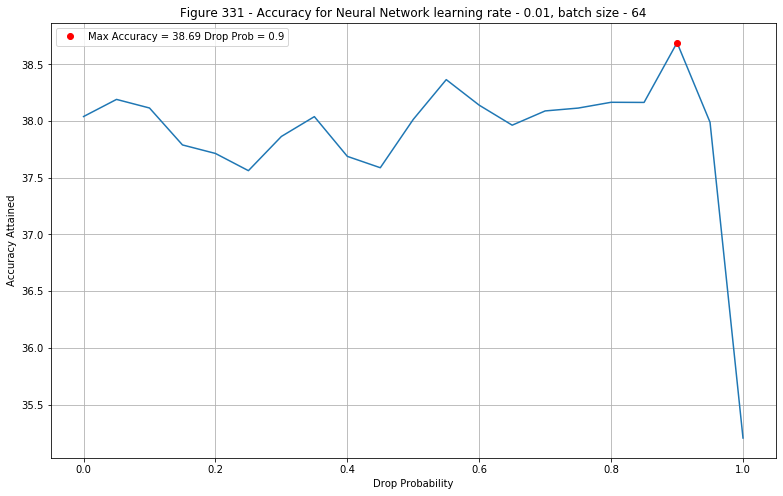

In [111]:
fig331 = plt.figure(figsize=(13, 8))
plt.plot(drop_prob_array, accuracy_array)
plt.plot(drop_rate_optimal, maximal_accuracy, 'ro', label=f"Max Accuracy = {maximal_accuracy:.2f} Drop Prob = {drop_rate_optimal}")
plt.xlabel("Drop Probability")
plt.ylabel("Accuracy Attained")
plt.grid()
plt.legend()

title331 = "Figure 331 - Accuracy for Neural Network learning rate - 0.01, batch size - 64"
plt.title(title331)
plt.savefig(title331 + ".png")
plt.show()

From the graph above, it is clear that the accuracy is highest when the drop probability is 0.9. This means that the 'effective' number of neurons in layer two is 20. We will fit the following models using this drop probability. The dropout probability controls the proportion of neurons that have their weights set to zero during each backpropagation during training. This technique is effective at reducing overfitting. The dropout only happens during training, and this feature gets turned off during testing/evaluating.

In [113]:
# Network with optimised dropout:
net_optimal = NeuralNet1(input_size, hidden_size, num_classes, drop_prob=drop_rate_optimal)
net_optimal = TD.send_to_gpu(net_optimal)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net_optimal.parameters(), lr=learning_rate_optimal)
C = Computations(net_optimal, num_epochs, criterion, optimiser, display_train=False)
loss_vals_optimal, t_diff_optimal = C.fit(train_loader)  # Training
acc_in_sample_net_optimal, predicted_labels_train_optimal = C.test_model_accuracy(train_loader)  # Evaluating in-sample
acc_out_sample_net_optimal, predicted_labels_test_optimal = C.test_model_accuracy(test_loader)  # Evaluating out-of-sample

Training completed in 26.4710 seconds
Accuracy attained = 39.870%
Accuracy attained = 55.746%


              precision    recall  f1-score   support

         acc       0.47      0.15      0.23       188
        good       0.48      0.31      0.38       204
       unacc       0.58      0.88      0.70       412
       vgood       0.55      0.53      0.54       188

    accuracy                           0.56       992
   macro avg       0.52      0.47      0.46       992
weighted avg       0.54      0.56      0.51       992



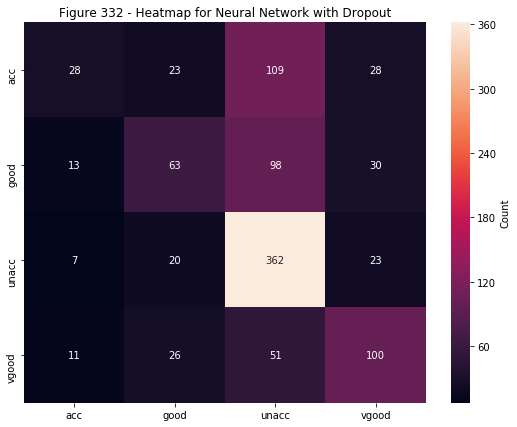

In [114]:
classification_report_nn_optimal = sklearn.metrics.classification_report(Y_test_nn, np.array(predicted_labels_test_optimal), target_names=['acc', 'good', 'unacc', 'vgood'])
print(classification_report_nn_optimal)
df_confusion_nn_optimal = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_nn, 
                                                                        np.array(predicted_labels_test_optimal)), 
                                       columns=['acc', 'good', 'unacc', 'vgood'], 
                                       index=['acc', 'good', 'unacc', 'vgood'])

fig332 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_nn_optimal, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})

title332 = "Figure 332 - Heatmap for Neural Network with Dropout"
plt.title(title332)
plt.savefig(title332 + ".png")
plt.show()

classification_report_nn_optimal = sklearn.metrics.classification_report(Y_test_nn, np.array(predicted_labels_test_optimal), target_names=['acc', 'good', 'unacc', 'vgood'], output_dict=True)

__3.4 Explanation of Results__

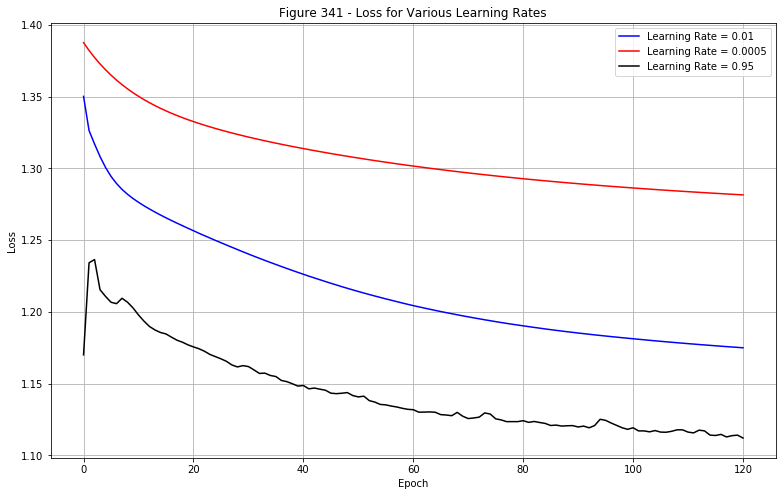

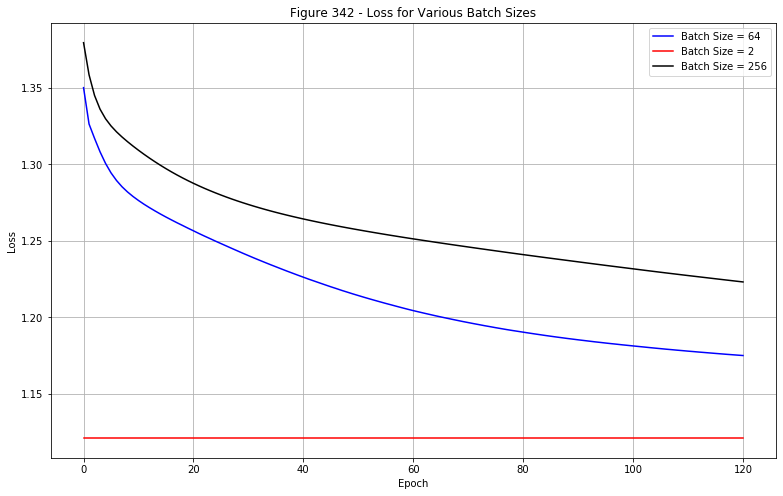

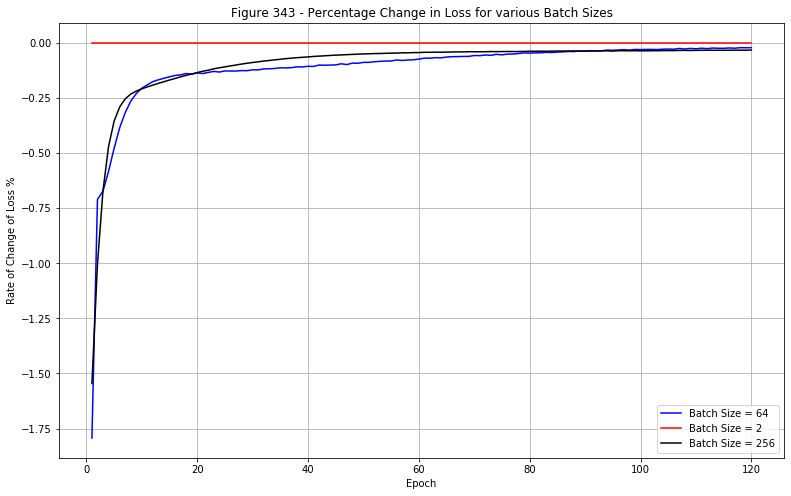

In [115]:
# Plot of Losses for Different Learning Rates:
fig341 = plt.figure(figsize=(13, 8))
plt.plot(range(121), loss_vals_no_dropout, 'b', label='Learning Rate = 0.01')
plt.plot(range(121), loss_vals_net311, 'r', label='Learning Rate = 0.0005')
plt.plot(range(121), loss_vals_net312, 'k', label='Learning Rate = 0.95')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

title341 = "Figure 341 - Loss for Various Learning Rates"
plt.title(title341)
plt.savefig(title341 + ".png")
plt.show()

# Plot of Losses for Different Batch Sizes:
fig342 = plt.figure(figsize=(13, 8))
plt.plot(range(121), loss_vals_no_dropout, 'b', label='Batch Size = 64')
plt.plot(range(121), loss_vals_net321, 'r', label='Batch Size = 2')
plt.plot(range(121), loss_vals_net322, 'k', label='Batch Size = 256')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

title342 = "Figure 342 - Loss for Various Batch Sizes"
plt.title(title342)
plt.savefig(title342 + ".png")
plt.show()

loss_vals_no_dropout_changes = np.diff(loss_vals_no_dropout) / loss_vals_no_dropout[1:] * 100
loss_vals_321_changes = np.diff(loss_vals_net321) / loss_vals_net321[1:] * 100
loss_vals_322_changes = np.diff(loss_vals_net322) / loss_vals_net322[1:] * 100

# Plot of Losses for Different Batch Sizes:
fig343 = plt.figure(figsize=(13, 8))
plt.plot(np.arange(1, 121), loss_vals_no_dropout_changes, 'b', label='Batch Size = 64')
plt.plot(np.arange(1, 121), loss_vals_321_changes, 'r', label='Batch Size = 2')
plt.plot(np.arange(1, 121), loss_vals_322_changes, 'k', label='Batch Size = 256')
plt.xlabel("Epoch")
plt.ylabel("Rate of Change of Loss %")
plt.grid()
plt.legend()

title343 = "Figure 343 - Percentage Change in Loss for various Batch Sizes"
plt.title(title343)
plt.savefig(title343 + ".png")
plt.show()

Figure 341 plots the loss against epoch for various methods. We can see that for the smallest learning rate, the line is smooth, implying small changes in gradient at each epoch, this is to be expected, as the learning rate governs the 'jump step' in gradient. For larger learning rate, the lines become more jagged, implying a higher variation in calculating the loss at every timestep.

Figure 342 confirms that the batch size does indeed affect the convergence of rate. We can see that the the best batch size is the one of size 64, as it converges at the fastest rate compared to the other batch sizes. The reason why the line for batch size=2 is flat can be explained by the fact that it fails to converge. This is most likely due that by random chance, the first computed loss is a local minimum and due to the small batch size, it is not able to 'come out' of the gradient valley, thus always staying in that gradient area, making the loss flat as epoch changes. This is a side effect of the 

Figure 343 illustrates how the loss changes over time for batch sizes. We can see that at the beginning there is a big jump in rate of change of loss, and this is due to the initial furious burn-in period of the neural network where the gradient steps are large

The point that we can draw is that 120 epochs is not enough to fully train the neural networks with batch sizes 64 and 256, as it is clear from the lines that they are still descending, implying that the loss hasn't converged.

<a id='task_4'></a>

### Task 4: Discussion of Results
***

Note: We will be refering to various results/plots previously not commented on (heatmaps, classification reports, and others) and count them as our 'additional computations' for this section.

__4.1 Comparison of models__

We begin by comparing the training and test times for the following models using the whole training dataset:

1. Optimal Random Forest.
2. Optimal Polynomial SVM.
3. Optimal Neural Network with tuned dropout rate.

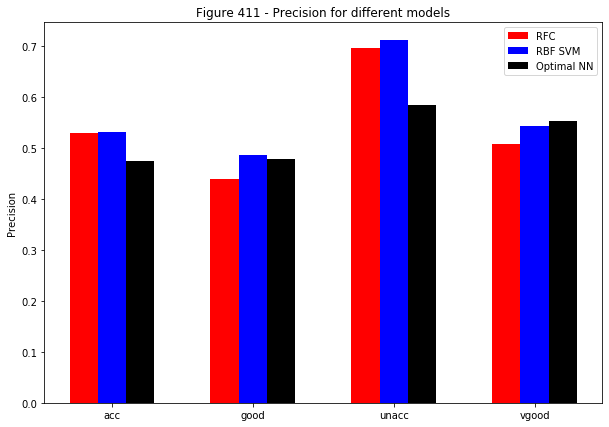

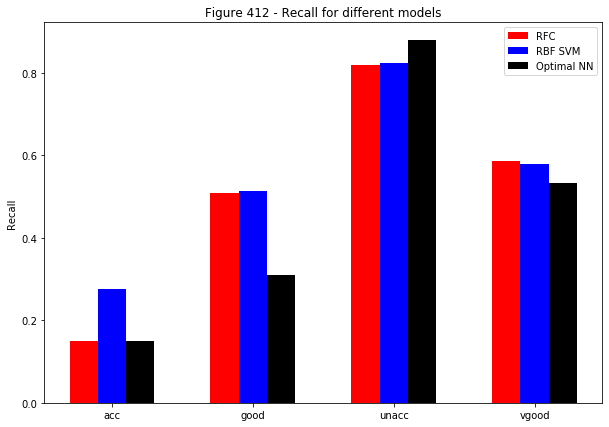

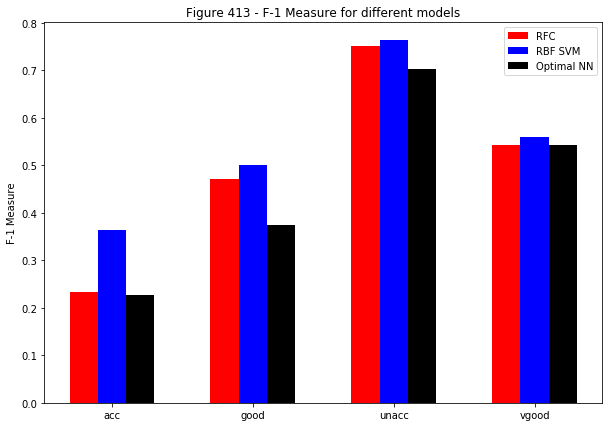

In [163]:
width=0.2
# PRECISION PLOTS - 

r1 = np.arange(4)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

rfc_precision = [classification_report_rfc[i]['precision'] for i in ['acc', 'good', 'unacc', 'vgood']]
rbf_svm_precision = [classification_report_svm_rbf[i]['precision'] for i in ['acc', 'good', 'unacc', 'vgood']]
nn_precision = [classification_report_nn_optimal[i]['precision'] for i in ['acc', 'good', 'unacc', 'vgood']]

rfc_recall = [classification_report_rfc[i]['recall'] for i in ['acc', 'good', 'unacc', 'vgood']]
rbf_svm_recall = [classification_report_svm_rbf[i]['recall'] for i in ['acc', 'good', 'unacc', 'vgood']]
nn_recall = [classification_report_nn_optimal[i]['recall'] for i in ['acc', 'good', 'unacc', 'vgood']]

rfc_f1 = [classification_report_rfc[i]['f1-score'] for i in ['acc', 'good', 'unacc', 'vgood']]
rbf_svm_f1 = [classification_report_svm_rbf[i]['f1-score'] for i in ['acc', 'good', 'unacc', 'vgood']]
nn_f1 = [classification_report_nn_optimal[i]['f1-score'] for i in ['acc', 'good', 'unacc', 'vgood']]

fig411 = plt.figure(figsize=(10, 7))
plt.bar(r1, rfc_precision, width, label='RFC', color='r')
plt.bar(r2, rbf_svm_precision, width, label='RBF SVM', color='b')
plt.bar(r3, nn_precision, width, label='Optimal NN', color='k')
plt.ylabel('Precision')
plt.xticks([r + width for r in range(4)], ['acc', 'good', 'unacc', 'vgood'])
plt.legend()

title411 = "Figure 411 - Precision for different models"
plt.title(title411)
plt.savefig(title411 + ".png")
plt.show()

# RECALL PLOTS
fig412 = plt.figure(figsize=(10, 7))

plt.bar(r1, rfc_recall, width, label='RFC', color='r')
plt.bar(r2, rbf_svm_recall, width, label='RBF SVM', color='b')
plt.bar(r3, nn_recall, width, label='Optimal NN', color='k')
plt.ylabel('Recall')
plt.xticks([r + width for r in range(4)], ['acc', 'good', 'unacc', 'vgood'])
plt.legend()

title412 = "Figure 412 - Recall for different models"
plt.title(title412)
plt.savefig(title412 + ".png")
plt.show()

# F1 PLOTS
fig413 = plt.figure(figsize=(10, 7))

plt.bar(r1, rfc_f1, width, label='RFC', color='r')
plt.bar(r2, rbf_svm_f1, width, label='RBF SVM', color='b')
plt.bar(r3, nn_f1, width, label='Optimal NN', color='k')
plt.ylabel('F-1 Measure')
plt.xticks([r + width for r in range(4)], ['acc', 'good', 'unacc', 'vgood'])
plt.legend()

title413 = "Figure 413 - F-1 Measure for different models"
plt.title(title413)
plt.savefig(title413 + ".png")
plt.show()

These bar charts summarise the data contained in the confusion matrices throughout this coursework.

A clear trend can be seen here, and this is that the precision, recall and f1 measures are highest across all three models for the unacc label. This is most likely a consequence of the fact that the data given was not very balanced (balancement was not required by Prof. Barahona), and so the models may be biased towards predicting unacc more correctly than the rest, thus giving these skewed measures. To balance data, we could do undersampling or oversampling. However, this has issues of its own and it is very difficult to avoid introducing bias into the dataset by sampling.

From these charts, we can see that overall, the RBF SVM Model performs best, followed by the Random Forest, and finally in last place comes the Neural Network with dropout regularisation. However, if a specific measure was to be maximised for a specific label, this final model choice may be differed.

The in-sample and out-of-sample accuracies are as follows (for the final run):
- Random Forest: In sample: 41%, Out of Sample: 58%.
- RBF SVM: In sample: 40%, Out of Sample: 61%
- Neural Network with Dropout Regularisation: In sample: 40%, Out of Sample: 56%

These figures support the fact that the RBF SVM has the best performance, as judged by the out-of-sample accuracy. It also gives evidence that it is the most generalisable to the data, whereas the neural network is the least generalisable.

It is interesting that for all three models, the in-sample accuracy is lower than the out-of-sample accuracy. This is not usually the case, and this could be due to a couple of factors:
1. The training set contains a lot more noise than the test set. Therefore, a model that trains on the training set, provided that it has not overfitted, should give better predictions on the test set.
2. The effect is due to chance, and how it was sampled from the population.

In the case of the RBF SVM model, it has the highest differential of accuracy of 11% when comparing in-sample and out-of-sample accuracies. This is evidence that it has proved to be the most general model of all, and has overfit the least.

The neural network has the lowest differential, at 8%, giving evidence that it may have overfitted to the noise of the training set more than the other classifiers.

Other computations may be used to compute the amount of information picked up by the classifiers, such as the cross entropy function, the ROC curve for each of the predictors and more...

__4.2 Suitability of models__

We begin by comparing the training and test times for the following models using the whole training dataset:

1. Optimal Random Forest.
2. Optimal Polynomial SVM.
3. Optimal Neural Network with tuned dropout rate.

In [175]:
# RANDOM FORESTS:
t1 = time.perf_counter()
rfc.fit(X_training_standardised, Y_training_categorical)
t2 = time.perf_counter()
rfc.predict(X_test_standardised)
t3 = time.perf_counter()
t_rfc_train, t_rfc_eval = (t2 - t1), (t3 - t2)

# RBF SVMs:
t4 = time.perf_counter()
svm_rbf.fit(X_training_standardised, Y_training_categorical)
t5 = time.perf_counter()
svm_rbf.predict(X_test_standardised)
t6 = time.perf_counter()
t_rbf_train, t_rbf_eval = (t5 - t4), (t6 - t5)

# Optimal NN
C = Computations(net_optimal, 120, criterion, optimiser, display_train=False)
t7 = time.perf_counter()
C.fit(train_loader)
t8 = time.perf_counter()
C.test_model_accuracy(test_loader)
t9 = time.perf_counter()
t_nn_train, t_nn_eval = (t8 - t7), (t9 - t8)

Training completed in 26.1331 seconds
Accuracy attained = 60.685%


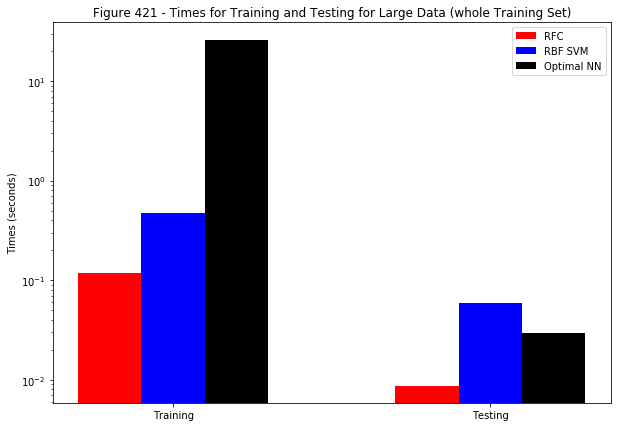

In [179]:
width=0.2
# Time plots for training and testing:

r1 = np.arange(2)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

fig421 = plt.figure(figsize=(10, 7))
plt.bar(r1, [t_rfc_train, t_rfc_eval], width, label='RFC', color='r')
plt.bar(r2, [t_rbf_train, t_rbf_eval], width, label='RBF SVM', color='b')
plt.bar(r3, [t_nn_train, t_nn_eval], width, label='Optimal NN', color='k')
plt.ylabel('Times (seconds)')
plt.xticks([r + width for r in range(2)], ['Training', 'Testing'])
plt.yscale('log')
plt.legend()

title421 = "Figure 421 - Times for Training and Testing for Large Data (whole Training Set)"
plt.title(title421)
plt.savefig(title421 + ".png")
plt.show()

For the tests in Figure 421, we used the entirety of the training set to perform these tests. This also gives a measure of scalability of the models.

In terms of the generalisation, the RBF SVM is the most generalisable, the Random Forest comes in second place and the Neural Network comes last in terms of generalisation. This is also the case with the interpretability. The RBF SVM has a relatively low number of parameters, the random forest has many parameters down the decision tree ensemble and the neural network has thousands of parameters, notably the weights of each neuron.

Our data is relatively low-dimensional. There are only 6 descriptors, and each are composed of at most 4 separate categories. Therefore, fitting a neural network with many parameters does not make much sense here, hence it won't be appropriate.

In terms of the computational complexity, this can me very roughly be measured by the time it takes to train as well as the time it takes to test, i.e. getting a prediction from the model.

Neural networks are notoriously cumbersome to train, and this is very strongly backed by the results in Figure 421. As we can see, the neural network's training time is approximately two orders of magnitude larger than the other classifiers. Once trained though, the neural network gives competitive prediction times, as the single forward pass through the neural network is not very computationally demanding.

There is a caveat here, as the PyTorch neural network implementation is wholly different than the scikit-learn SVM and Random Forest implementations. For instance, the scikit-learn implementation is not parallelised (indeed, some of the scikit algorithms cannot be parallelised), and can only run on one core of the CPU. The PyTorch neural network on the other hand is optimised to run in parallel, and it also has capabilities to use the GPU of a computer, and therefore this will need to be taken into account.

__Based on the evidence presented in the entirety of Section 4, we recommend that the RBF SVM model is used for our manager.__

### Task 5: Mastery Component
***

__Task 5.1 Creating a Deep Neural Networks__

In [116]:
# Defining the Neural Net Architecture
class NeuralNet2(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        
        # 4-Hidden Layers
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size)
        self.fc3 = torch.nn.Linear(hidden_size, hidden_size)
        self.fc4 = torch.nn.Linear(hidden_size, hidden_size)
        self.fc5 = torch.nn.Linear(hidden_size, hidden_size)
        
        # Ouput Layer (num_classes Outputs)
        self.fc6 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Activation units: Relu
        out = torch.nn.functional.relu(self.fc1(x))
        out = torch.nn.functional.relu(self.fc2(out))
        out = torch.nn.functional.relu(self.fc3(out))
        out = torch.nn.functional.relu(self.fc4(out))
        out = torch.nn.functional.relu(self.fc5(out))      
        out = self.fc6(out)
        return out

In [183]:
input_size = 6
hidden_size = 80
num_classes = 4
learning_rate = 0.01
batch_size = 64

K_folds_train_loaders, K_folds_val_loaders, train_loader, test_loader = create_loaders(batch_size, X_training_nn, Y_training_nn, X_test_nn, Y_test_nn)
net51 = NeuralNet2(input_size, hidden_size, num_classes)
net51 = TD.send_to_gpu(net51)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net51.parameters(), lr=learning_rate_optimal)
C = Computations(net51, num_epochs, criterion, optimiser, display_train=False)
loss_vals_net51, t_diff_net51 = C.fit(train_loader)  # Training
acc_in_sample_net51, predicted_labels_train_net51 = C.test_model_accuracy(train_loader)  # Evaluating in-sample
acc_out_sample_net51, predicted_labels_test_net51 = C.test_model_accuracy(test_loader)  # Evaluating out-of-sample

Training completed in 33.7456 seconds
Accuracy attained = 38.566%
Accuracy attained = 49.798%


              precision    recall  f1-score   support

         acc       0.50      0.02      0.04       188
        good       0.32      0.69      0.44       204
       unacc       0.63      0.85      0.73       412
       vgood       0.00      0.00      0.00       188

    accuracy                           0.50       992
   macro avg       0.36      0.39      0.30       992
weighted avg       0.42      0.50      0.40       992



C:\Users\redfox\Python_Venvs\Main\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


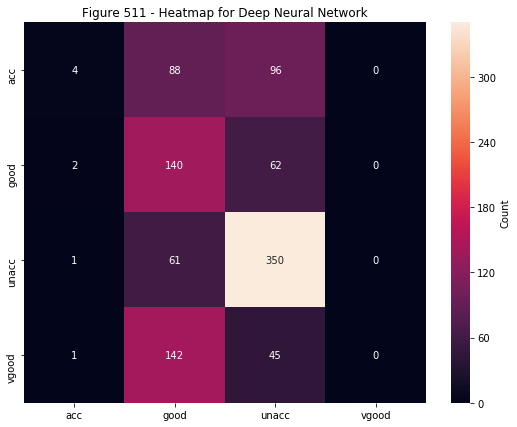

In [184]:
# Heatmap, Classification Report
classification_report_nn_n51 =  sklearn.metrics.classification_report(Y_test_nn, np.array(predicted_labels_test_net51), target_names=['acc', 'good', 'unacc', 'vgood'])
print(classification_report_nn_n51)
df_confusion_nn_n51 = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_nn, 
                                                                    np.array(predicted_labels_test_net51)), 
                                       columns=['acc', 'good', 'unacc', 'vgood'], 
                                       index=['acc', 'good', 'unacc', 'vgood'])

fig511 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_nn_n51, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})

title511 = "Figure 511 - Heatmap for Deep Neural Network"
plt.title(title511)
plt.savefig(title511 + ".png")
plt.show()

__Discussion:__

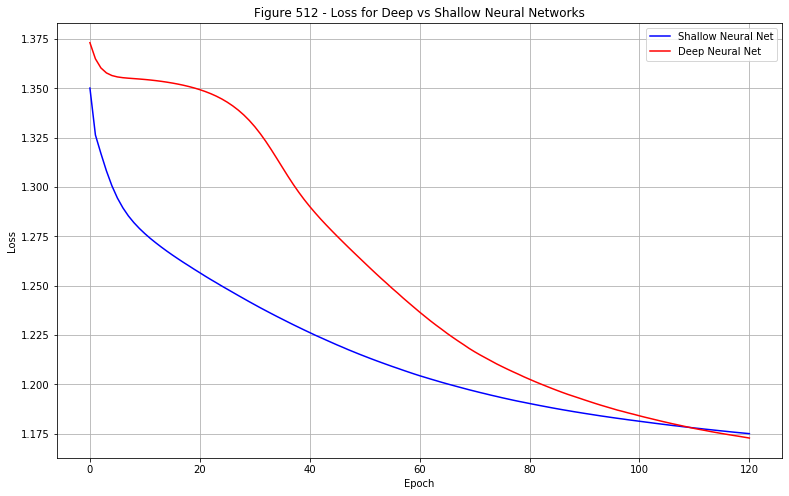

In [185]:
# Plot of Losses for Different Learning Rates:
fig512 = plt.figure(figsize=(13, 8))
plt.plot(range(121), loss_vals_no_dropout, 'b', label='Shallow Neural Net')
plt.plot(range(121), loss_vals_net51, 'r', label='Deep Neural Net')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.grid()
plt.legend()

title512 = "Figure 512 - Loss for Deep vs Shallow Neural Networks"
plt.title(title512)
plt.savefig(title512 + ".png")
plt.show()

The deep neural network performs very badly for this set of data. This is clearly shown by the fact that the accuracies are: in-sample 39% and out-of-sample 49%. This is strong evidence that the network badly overfits to the data.

This is to be expected, as the deep neural network with 5 layers with 80 layers will have many more parameters than the shallow 2-layered network with 200 networks each.

The loss function shows a strange kink beteen epochs 10 and 30, which may be caused by the loss function reaching a plateau during these epochs.

The confusion matrix of this network is catastrophic as well, and it was only barely able to classify 'good' and 'unacc' correctly, suggesting that it has picked up on the fact that these are at the 'extremes' of our data. This could be fixed by changing our approach to the data and treating it as regression variables, where the distance between the datapoints would count, i.e. the difference betwen unacc and acc may be different than the distance between 'acc' and 'good'. Relationships of these forms were never explored in this coursework. 

In terms of the computational complexity, due to the larger number of parameters, this deep network took a lot more time to train, which is not desirable either.

Overall, this network is not worth using in its current form.

<a id='task_502'></a>

__Task 5.2 Creating a Sigmoidal Neural Network__

In [186]:
class NeuralNet3(torch.nn.Module):
    def __init__(self,
                 input_size,
                 hidden_size, 
                 num_classes,
                 drop_prob):
        super(NeuralNet3, self).__init__()
        self.drop_prob = drop_prob
        self.fc1 = torch.nn.Linear(input_size, hidden_size)  # First hidden layer
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size)  # Second hidden layer
        self.fc3 = torch.nn.Linear(hidden_size, num_classes)  # Output layer
        
    def forward(self, x):
        """ Computes the forward pass of the neural network"""
        out = torch.sigmoid(self.fc1(x))  # Sigmoid activation
        out = torch.sigmoid(self.fc2(out))  # Sigmoid activation
        out = torch.nn.functional.dropout(out, p=self.drop_prob, training=self.training)  # Dropout
        out = self.fc3(out)  # Output labels
        return out

In [192]:
input_size = 6
hidden_size = 200
num_classes = 4
learning_rate = 0.01
batch_size = 64

net52 = NeuralNet3(input_size, hidden_size, num_classes, drop_prob=0.5)
net52 = TD.send_to_gpu(net52)
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(net52.parameters(), lr=learning_rate_optimal)
C = Computations(net52, num_epochs, criterion, optimiser, display_train=False)
loss_vals_net52, t_diff_net52 = C.fit(train_loader)  # Training
acc_in_sample_net52, predicted_labels_train_net52 = C.test_model_accuracy(train_loader)  # Evaluating in-sample
acc_out_sample_net52, predicted_labels_test_net52 = C.test_model_accuracy(test_loader)  # Evaluating out-of-sample

Training completed in 30.0175 seconds
Accuracy attained = 35.231%
Accuracy attained = 41.532%


              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       188
        good       0.00      0.00      0.00       204
       unacc       0.42      1.00      0.59       412
       vgood       0.00      0.00      0.00       188

    accuracy                           0.42       992
   macro avg       0.10      0.25      0.15       992
weighted avg       0.17      0.42      0.24       992



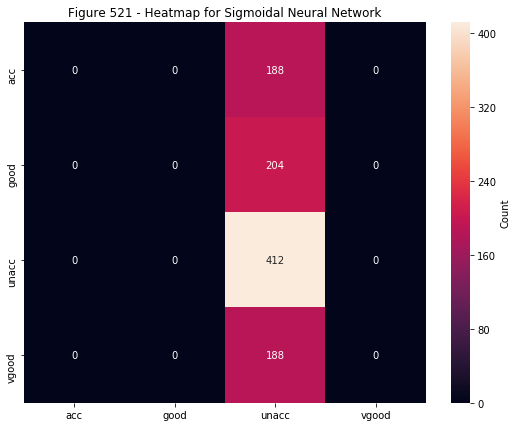

In [193]:
# Heatmap, Classification Report
classification_report_nn_net52 = sklearn.metrics.classification_report(Y_test_nn, np.array(predicted_labels_test_net52), target_names=['acc', 'good', 'unacc', 'vgood'])
print(classification_report_nn_net52)
df_confusion_nn_net52 = pd.DataFrame(sklearn.metrics.confusion_matrix(Y_test_nn, 
                                                                        np.array(predicted_labels_test_net52)), 
                                       columns=['acc', 'good', 'unacc', 'vgood'], 
                                       index=['acc', 'good', 'unacc', 'vgood'])

fig521 = plt.figure(figsize=(9, 7))
sns.heatmap(df_confusion_nn_net52, annot=True, cbar=True, fmt='g', cbar_kws={'label': "Count"})

title521 = "Figure 521 - Heatmap for Sigmoidal Neural Network"
plt.title(title521)
plt.savefig(title521 + ".png")
plt.show()

# Training time, Testing time

__Discussion & Comparison of models:__


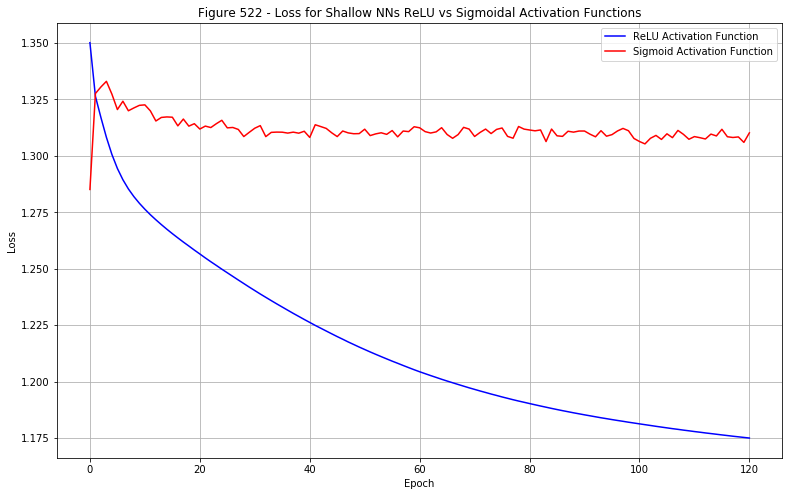

In [194]:
# Plot of Losses for Different Learning Rates:
fig522 = plt.figure(figsize=(13, 8))
plt.plot(range(121), loss_vals_no_dropout, 'b', label='ReLU Activation Function')
plt.plot(range(121), loss_vals_net52, 'r', label='Sigmoid Activation Function')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.grid()
plt.legend()

title522 = "Figure 522 - Loss for Shallow NNs ReLU vs Sigmoidal Activation Functions"
plt.title(title522)
plt.savefig(title522 + ".png")
plt.show()

This network performed terribly. The network simply assigned every datapoint into the 'unacc' category. The loss function was very non-smooth, in fact increasing at the beginning.

The sigmoid function is not sensitive at its extremities. If the activation function reaches values on the 'flat' sides of the sigmoid function, the learning rate becomes stangant or very slow. This can be seen in our model for epoch 40+.

The speed of convergence for the ReLU Networks is clearly much greater and smoother.

Another factor which makes this model worse is that the training time was greater than the other network.